# Predicting Board Game Scores

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/BoardGameGeek_Logo.svg/1200px-BoardGameGeek_Logo.svg.png" width="600">

# Executive Summary

Using metrics found on the website, https://boardgamegeek.com/, I wanted to explore whether it is possible to use machine learning to predict the Average Score given to a game by users.

The predictors were the things that make the game themselves, the Categories, the Mechanics, the number of players, and the difficulty of the game itself, these were to be obtained by a web scrape of the nicely laid out website.

I encountered several hurdles along the way, the website itself did not have very robust servers, making scraping a painfully slow process. Were I to have had more time I would have like to do more feature engineering on the Category and Mechanics Predictors as well as looking at the average Ratings for each of their subcategories.

EDA of the data uncovered some interesting things. People were more likely to enjoy a game if it was more difficult and if it lasted longer. The most popular mechanics for a game are dice rolling and card playing, something that does not seem to have changed in the 500 year history of games that I explored. From the predictors I was able to use, and the ones that I engineered, a model was created that unfortunately did not meet the baseline score.

There is lots of scope for further exploration! Reducing overfitting, NLP on the description, further hyperparameter tuning, dummifying the Mechanics and Category predictors and finishing my own scrape to get a larger, more detailed data set.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Viewing-Web-Page-Text" data-toc-modified-id="Viewing-Web-Page-Text-1">Viewing Web Page Text</a></span><ul class="toc-item"><li><span><a href="#Set-Up-Scrape-Functions" data-toc-modified-id="Set-Up-Scrape-Functions-1.1">Set Up Scrape Functions</a></span><ul class="toc-item"><li><span><a href="#Item-ID" data-toc-modified-id="Item-ID-1.1.1">Item ID</a></span></li><li><span><a href="#Game-Name" data-toc-modified-id="Game-Name-1.1.2">Game Name</a></span></li><li><span><a href="#Year-Published" data-toc-modified-id="Year-Published-1.1.3">Year Published</a></span></li><li><span><a href="#Publisher" data-toc-modified-id="Publisher-1.1.4">Publisher</a></span></li><li><span><a href="#Description" data-toc-modified-id="Description-1.1.5">Description</a></span></li><li><span><a href="#Min-Players" data-toc-modified-id="Min-Players-1.1.6">Min Players</a></span></li><li><span><a href="#Max-Players" data-toc-modified-id="Max-Players-1.1.7">Max Players</a></span></li><li><span><a href="#Min-playtime" data-toc-modified-id="Min-playtime-1.1.8">Min playtime</a></span></li><li><span><a href="#Max-playtime" data-toc-modified-id="Max-playtime-1.1.9">Max playtime</a></span></li><li><span><a href="#Min-age" data-toc-modified-id="Min-age-1.1.10">Min age</a></span></li><li><span><a href="#Weight" data-toc-modified-id="Weight-1.1.11">Weight</a></span></li><li><span><a href="#Category" data-toc-modified-id="Category-1.1.12">Category</a></span></li><li><span><a href="#Mechanics" data-toc-modified-id="Mechanics-1.1.13">Mechanics</a></span></li><li><span><a href="#No.-User-Ratings" data-toc-modified-id="No.-User-Ratings-1.1.14">No. User Ratings</a></span></li><li><span><a href="#rating-score" data-toc-modified-id="rating-score-1.1.15">rating score</a></span></li></ul></li></ul></li><li><span><a href="#The-Scrape" data-toc-modified-id="The-Scrape-2">The Scrape</a></span><ul class="toc-item"><li><span><a href="#Saving-to-a-CSV" data-toc-modified-id="Saving-to-a-CSV-2.1">Saving to a CSV</a></span></li></ul></li><li><span><a href="#Web-Scraping-Summary" data-toc-modified-id="Web-Scraping-Summary-3">Web Scraping Summary</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-4">Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Import-Modules-and-Data" data-toc-modified-id="Import-Modules-and-Data-4.1">Import Modules and Data</a></span></li><li><span><a href="#Basic-Format-and-Columns-of-the-Data" data-toc-modified-id="Basic-Format-and-Columns-of-the-Data-4.2">Basic Format and Columns of the Data</a></span></li><li><span><a href="#Drop-Unwanted-Columns" data-toc-modified-id="Drop-Unwanted-Columns-4.3">Drop Unwanted Columns</a></span></li></ul></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-5">Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Changing-Column-Types" data-toc-modified-id="Changing-Column-Types-5.1">Changing Column Types</a></span><ul class="toc-item"><li><span><a href="#Min-Age" data-toc-modified-id="Min-Age-5.1.1">Min Age</a></span></li><li><span><a href="#Rating-Average" data-toc-modified-id="Rating-Average-5.1.2">Rating Average</a></span></li><li><span><a href="#Complexity-Average" data-toc-modified-id="Complexity-Average-5.1.3">Complexity Average</a></span></li></ul></li><li><span><a href="#Cleaning-Corrupted-Data" data-toc-modified-id="Cleaning-Corrupted-Data-5.2">Cleaning Corrupted Data</a></span><ul class="toc-item"><li><span><a href="#Year-Published" data-toc-modified-id="Year-Published-5.2.1">Year Published</a></span></li><li><span><a href="#Owned-Users" data-toc-modified-id="Owned-Users-5.2.2">Owned Users</a></span></li><li><span><a href="#Mechanics" data-toc-modified-id="Mechanics-5.2.3">Mechanics</a></span></li><li><span><a href="#Domains" data-toc-modified-id="Domains-5.2.4">Domains</a></span></li></ul></li><li><span><a href="#Renaming-Columns" data-toc-modified-id="Renaming-Columns-5.3">Renaming Columns</a></span></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-6">Feature Engineering</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Game-Age" data-toc-modified-id="Game-Age-6.0.1">Game Age</a></span></li><li><span><a href="#Counting-number-of-Mechanics" data-toc-modified-id="Counting-number-of-Mechanics-6.0.2">Counting number of Mechanics</a></span></li><li><span><a href="#Counting-number-of-Categories" data-toc-modified-id="Counting-number-of-Categories-6.0.3">Counting number of Categories</a></span></li></ul></li></ul></li><li><span><a href="#Summary-Statistics" data-toc-modified-id="Summary-Statistics-7">Summary Statistics</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#3500-BCE-Game" data-toc-modified-id="3500-BCE-Game-7.0.1">3500 BCE Game</a></span></li><li><span><a href="#Minimum-0-Player-Games" data-toc-modified-id="Minimum-0-Player-Games-7.0.2">Minimum 0 Player Games</a></span></li><li><span><a href="#Maximum-Player-Games" data-toc-modified-id="Maximum-Player-Games-7.0.3">Maximum Player Games</a></span></li><li><span><a href="#Max-Play-Time" data-toc-modified-id="Max-Play-Time-7.0.4">Max Play Time</a></span></li></ul></li></ul></li><li><span><a href="#Graphical-Evaluation" data-toc-modified-id="Graphical-Evaluation-8">Graphical Evaluation</a></span><ul class="toc-item"><li><span><a href="#Histograms" data-toc-modified-id="Histograms-8.1">Histograms</a></span><ul class="toc-item"><li><span><a href="#Distinguish-Continuous-and-Categorical-Variables" data-toc-modified-id="Distinguish-Continuous-and-Categorical-Variables-8.1.1">Distinguish Continuous and Categorical Variables</a></span></li></ul></li><li><span><a href="#Identify-Potential-Outliers-with-Boxplots" data-toc-modified-id="Identify-Potential-Outliers-with-Boxplots-8.2">Identify Potential Outliers with Boxplots</a></span><ul class="toc-item"><li><span><a href="#Removing-Outliers" data-toc-modified-id="Removing-Outliers-8.2.1">Removing Outliers</a></span></li></ul></li><li><span><a href="#Correlation-Matrix" data-toc-modified-id="Correlation-Matrix-8.3">Correlation Matrix</a></span></li><li><span><a href="#Scatter-Plots" data-toc-modified-id="Scatter-Plots-8.4">Scatter Plots</a></span></li><li><span><a href="#More-Detailed-Look-at-Categories-and-Mechanics" data-toc-modified-id="More-Detailed-Look-at-Categories-and-Mechanics-8.5">More Detailed Look at Categories and Mechanics</a></span></li></ul></li><li><span><a href="#EDA-Summary" data-toc-modified-id="EDA-Summary-9">EDA Summary</a></span></li><li><span><a href="#Setup" data-toc-modified-id="Setup-10">Setup</a></span><ul class="toc-item"><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-10.1">Importing Libraries</a></span></li><li><span><a href="#Finding-a-Baseline" data-toc-modified-id="Finding-a-Baseline-10.2">Finding a Baseline</a></span></li><li><span><a href="#Getting-Dummies" data-toc-modified-id="Getting-Dummies-10.3">Getting Dummies</a></span></li><li><span><a href="#Creating-a-Pipeline" data-toc-modified-id="Creating-a-Pipeline-10.4">Creating a Pipeline</a></span></li></ul></li><li><span><a href="#Model-Fitting" data-toc-modified-id="Model-Fitting-11">Model Fitting</a></span><ul class="toc-item"><li><span><a href="#Models-using-predictors-with-fewer-outliers" data-toc-modified-id="Models-using-predictors-with-fewer-outliers-11.1">Models using predictors with fewer outliers</a></span><ul class="toc-item"><li><span><a href="#Without-Multicollinearity-and-with-Dummy-Variables-and-Fewer-Outliers" data-toc-modified-id="Without-Multicollinearity-and-with-Dummy-Variables-and-Fewer-Outliers-11.1.1">Without Multicollinearity and with Dummy Variables and Fewer Outliers</a></span></li><li><span><a href="#With-Multicollinearity-and-with-Dummy-Variables-and-Fewer-Outliers" data-toc-modified-id="With-Multicollinearity-and-with-Dummy-Variables-and-Fewer-Outliers-11.1.2">With Multicollinearity and with Dummy Variables and Fewer Outliers</a></span></li></ul></li><li><span><a href="#Models-using-predictors-with-all-outliers" data-toc-modified-id="Models-using-predictors-with-all-outliers-11.2">Models using predictors with all outliers</a></span><ul class="toc-item"><li><span><a href="#With-multicollinearity-and-no-dummy-variables:" data-toc-modified-id="With-multicollinearity-and-no-dummy-variables:-11.2.1">With multicollinearity and no dummy variables:</a></span></li><li><span><a href="#With-multicollinearity-and-dummy-variables:" data-toc-modified-id="With-multicollinearity-and-dummy-variables:-11.2.2">With multicollinearity and dummy variables:</a></span></li><li><span><a href="#Without-predictors-that-wouldn't-be-available-for-new-games:" data-toc-modified-id="Without-predictors-that-wouldn't-be-available-for-new-games:-11.2.3">Without predictors that wouldn't be available for new games:</a></span></li></ul></li><li><span><a href="#Observations" data-toc-modified-id="Observations-11.3">Observations</a></span></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-11.4">Hyperparameter Tuning</a></span></li></ul></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-12">Evaluation</a></span><ul class="toc-item"><li><span><a href="#Creating-a-new-Instance-of-RandomForestRegressor-with-Optimised-Hyperparameters" data-toc-modified-id="Creating-a-new-Instance-of-RandomForestRegressor-with-Optimised-Hyperparameters-12.1">Creating a new Instance of RandomForestRegressor with Optimised Hyperparameters</a></span><ul class="toc-item"><li><span><a href="#Getting-Predicted-Values" data-toc-modified-id="Getting-Predicted-Values-12.1.1">Getting Predicted Values</a></span></li></ul></li><li><span><a href="#Scoring-the-Model" data-toc-modified-id="Scoring-the-Model-12.2">Scoring the Model</a></span><ul class="toc-item"><li><span><a href="#R-Squared-Score" data-toc-modified-id="R-Squared-Score-12.2.1">R Squared Score</a></span></li><li><span><a href="#Mean-Absolute-Error-and-Mean-Absolute-Percentage-Error" data-toc-modified-id="Mean-Absolute-Error-and-Mean-Absolute-Percentage-Error-12.2.2">Mean Absolute Error and Mean Absolute Percentage Error</a></span></li><li><span><a href="#Mean-Squared-Error-and-Root-Mean-Squared-Error" data-toc-modified-id="Mean-Squared-Error-and-Root-Mean-Squared-Error-12.2.3">Mean Squared Error and Root Mean Squared Error</a></span></li><li><span><a href="#Comparing" data-toc-modified-id="Comparing-12.2.4">Comparing</a></span></li></ul></li><li><span><a href="#Comparing-True-and-Predicted-Values" data-toc-modified-id="Comparing-True-and-Predicted-Values-12.3">Comparing True and Predicted Values</a></span></li><li><span><a href="#Looking-at-Feature-Importances" data-toc-modified-id="Looking-at-Feature-Importances-12.4">Looking at Feature Importances</a></span></li></ul></li><li><span><a href="#Modeling-and-Evaluation-Summary" data-toc-modified-id="Modeling-and-Evaluation-Summary-13">Modeling and Evaluation Summary</a></span></li></ul></div>

# Data Scraping

Import the required packages

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
from tqdm import tqdm
from time import sleep
from random import randint

## Viewing Web Page Text

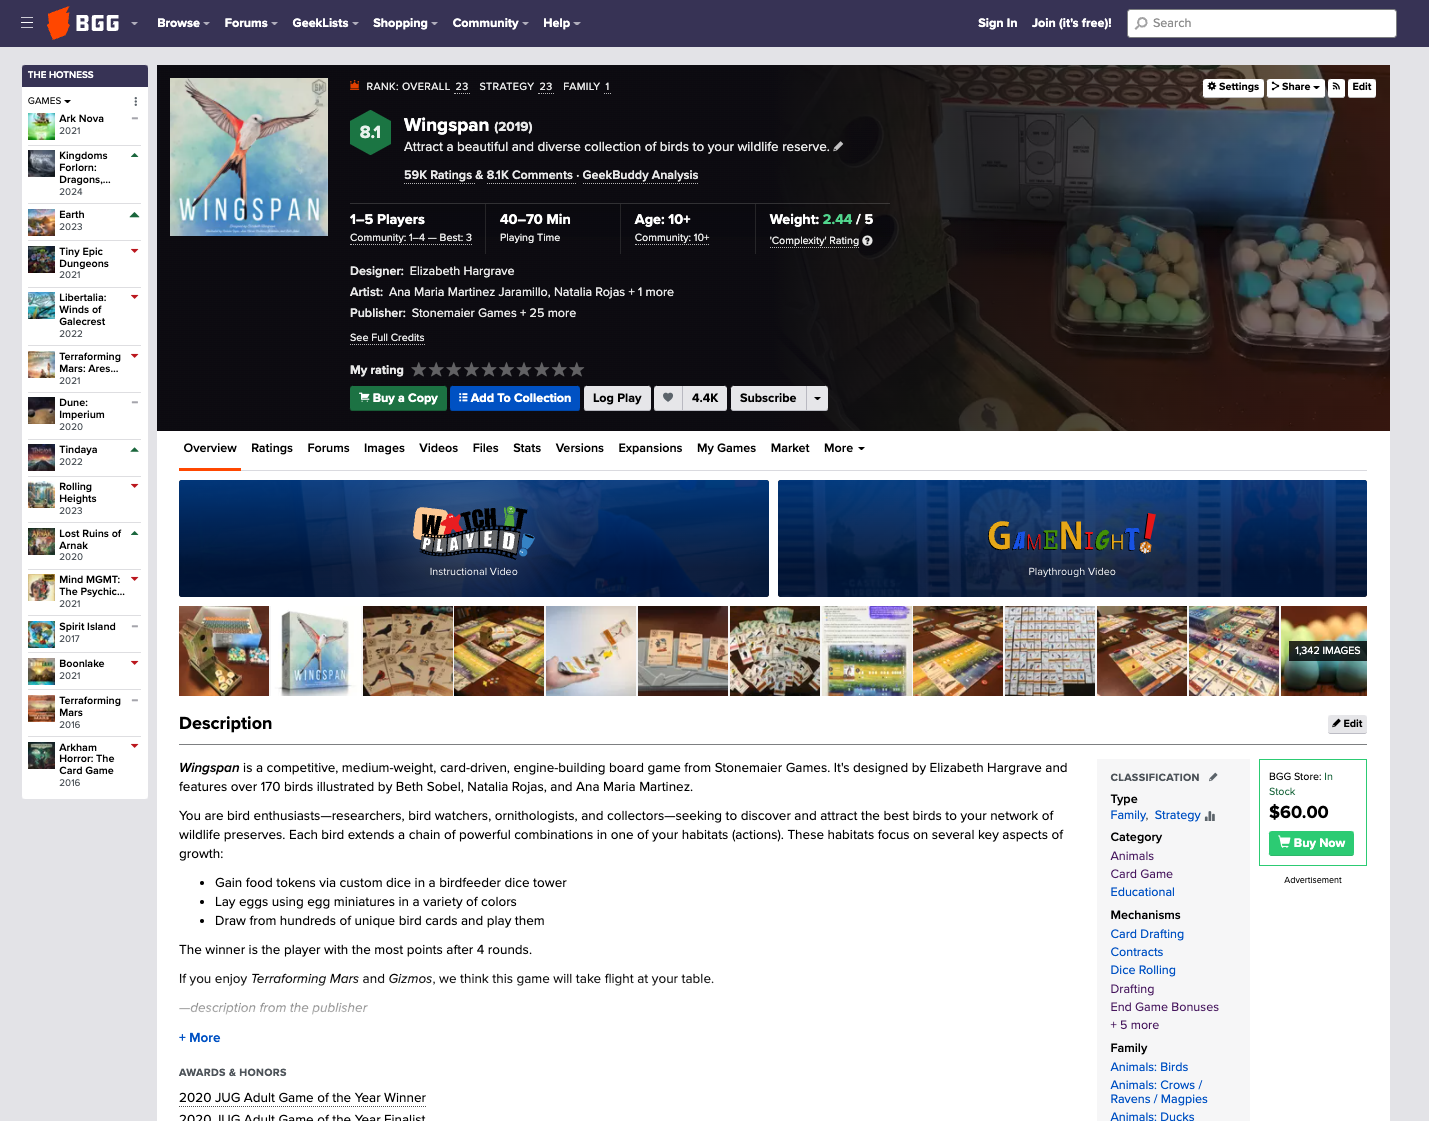
_Page view for the Game 'Wingspan'_
            

The website I wanted to scrape conveniently has it's own API as described below.

https://boardgamegeek.com/wiki/page/BGG_XML_API2

'id=xxxx' is the part of the url denoting the board game ID

'&stats=1' is the part of the url requesting the stats for that game.

There are potentially other things to scrape, such as users, their libraries and their ratings. However they are out of the scope of this project.

In [2]:
url = 'https://boardgamegeek.com/xmlapi2/thing?id=266192&stats=1'

r = requests.get(url)
soup = BeautifulSoup(r.text, "xml")

In [3]:
print(soup.prettify()[:5000])

<?xml version="1.0" encoding="utf-8"?>
<items termsofuse="https://boardgamegeek.com/xmlapi/termsofuse">
 <item id="266192" type="boardgame">
  <thumbnail>
   https://cf.geekdo-images.com/yLZJCVLlIx4c7eJEWUNJ7w__thumb/img/VNToqgS2-pOGU6MuvIkMPKn_y-s=/fit-in/200x150/filters:strip_icc()/pic4458123.jpg
  </thumbnail>
  <image>
   https://cf.geekdo-images.com/yLZJCVLlIx4c7eJEWUNJ7w__original/img/cI782Zis9cT66j2MjSHKJGnFPNw=/0x0/filters:format(jpeg)/pic4458123.jpg
  </image>
  <name sortindex="1" type="primary" value="Wingspan"/>
  <name sortindex="1" type="alternate" value="Fesztáv"/>
  <name sortindex="1" type="alternate" value="Flügelschlag"/>
  <name sortindex="1" type="alternate" value="Na křídlech"/>
  <name sortindex="1" type="alternate" value="Na skrzydłach"/>
  <name sortindex="1" type="alternate" value="Spārnotie"/>
  <name sortindex="1" type="alternate" value="Sparnuotieji"/>
  <name sortindex="1" type="alternate" value="Tiivulised"/>
  <name sortindex="1" type="alternate" value="

Beautiful soup shows that the tags change once scraped. This changes how I have to search for them slightly.

In [4]:
print(soup.get_text()[:1000])


https://cf.geekdo-images.com/yLZJCVLlIx4c7eJEWUNJ7w__thumb/img/VNToqgS2-pOGU6MuvIkMPKn_y-s=/fit-in/200x150/filters:strip_icc()/pic4458123.jpg
https://cf.geekdo-images.com/yLZJCVLlIx4c7eJEWUNJ7w__original/img/cI782Zis9cT66j2MjSHKJGnFPNw=/0x0/filters:format(jpeg)/pic4458123.jpg


















Wingspan is&nbsp;a competitive, medium-weight, card-driven, engine-building board game from Stonemaier Games. It's designed by Elizabeth Hargrave and features over 170 birds illustrated by Beth Sobel, Natalia Rojas, and Ana Maria Martinez.&#10;&#10;You are bird enthusiasts&mdash;researchers, bird watchers, ornithologists, and collectors&mdash;seeking to discover and attract the best birds to your network of wildlife preserves. Each bird extends a chain of powerful combinations in one of your habitats (actions). These habitats  focus on several key aspects of growth:&#10;&#10;&#10;     Gain food tokens via custom dice in a birdfeeder dice tower&#10;     Lay eggs using egg miniatures in a variety 

From the page I want to scrape the following items:
- Item id
- Name
- Year Published
- Publisher
- Description
- Min Players
- Max Players
- Min Playing time
- Max Playing time
- Recommended age
- Weight
- Categories
- Mechanisms
- No. user ratings
- Average Rating

### Set Up Scrape Functions

I will create functions for each item that I want to scrape from the page.

#### Item ID

In [5]:
int(soup.find('item').get('id'))

266192

In [6]:
def extract_item_id(result):
    """
    Function to pull item id from board game results
    """

#   item_id = []
    
    try:
        item_id.append(int(soup.find('item').get('id')))
    except:
        item_id.append(np.nan)
    
    return item_id

In [7]:
#extract_item_id(soup)

#### Game Name

In [8]:
soup.find('name').get('value')

'Wingspan'

In [9]:
def extract_name(result):
    """
    Function to pull name from board game results
    """

#   name = []
    
    try:
        name.append(soup.find('name').get('value'))
    except:
        name.append(np.nan)
    
    return name

In [10]:
#extract_name(soup)

#### Year Published

In [11]:
int(soup.find('yearpublished').get('value'))

2019

In [12]:
def extract_year(result):
    """
    Function to pull year from board game results
    """

#   year = []
    
    try:
        year.append(int(soup.find('yearpublished').get('value')))
    except:
        year.append(np.nan)
    
    return year

In [13]:
#extract_year(soup)

#### Publisher

In [14]:
soup.find('link', attrs={'type':'boardgamepublisher'}).get('value')

'Stonemaier Games'

In [15]:
def extract_publisher(result):
    """
    Function to pull publisher from board game results, and turn the list into a string
    """

#    publisher = []

    try:
        publisher.append(soup.find('link', attrs={'type':'boardgamepublisher'}).get('value'))
    except:
        publisher.append(np.nan)
    
    return publisher

In [16]:
#extract_publisher(soup)

#### Description

In [17]:
soup.find('description').text

"Wingspan is&nbsp;a competitive, medium-weight, card-driven, engine-building board game from Stonemaier Games. It's designed by Elizabeth Hargrave and features over 170 birds illustrated by Beth Sobel, Natalia Rojas, and Ana Maria Martinez.&#10;&#10;You are bird enthusiasts&mdash;researchers, bird watchers, ornithologists, and collectors&mdash;seeking to discover and attract the best birds to your network of wildlife preserves. Each bird extends a chain of powerful combinations in one of your habitats (actions). These habitats  focus on several key aspects of growth:&#10;&#10;&#10;     Gain food tokens via custom dice in a birdfeeder dice tower&#10;     Lay eggs using egg miniatures in a variety of colors&#10;     Draw from hundreds of unique bird cards and play them&#10;&#10;&#10;The winner is the player with the most points after 4 rounds.&#10;&#10;If you enjoy Terraforming Mars and Gizmos, we think this game will take flight at your table.&#10;&#10;&mdash;description from the publis

In [18]:
def extract_description(result):
    """
    Function to pull description from board game results
    """

#   description = []
    
    try:
        description.append(soup.find('description').text)
    except:
        description.append(np.nan)
    
    return description

In [19]:
#extract_description(soup)

#### Min Players

In [20]:
int(soup.find('minplayers').get('value'))

1

In [21]:
def extract_min_players(result):
    """
    Function to pull minimum players from board game results
    """

    #min_players = []
    
    try:
        min_players.append(int(soup.find('minplayers').get('value')))
    except:
        min_players.append(np.nan)
    
    return min_players

In [22]:
#extract_min_players(soup)

#### Max Players

In [23]:
int(soup.find('maxplayers').get('value'))

5

In [24]:
def extract_max_players(result):
    """
    Function to pull maximum players from board game results
    """

    #max_players = []
    
    try:
        max_players.append(int(soup.find('maxplayers').get('value')))
    except:
        max_players.append(np.nan)
    
    return max_players

In [25]:
#extract_max_players(soup)

#### Min playtime

In [26]:
int(soup.find('minplaytime').get('value'))

40

In [27]:
def extract_min_playtime(result):
    """
    Function to pull minimum playtime from board game results
    """

    #min_playtime = []
    
    try:
        min_playtime.append(int(soup.find('minplaytime').get('value')))
    except:
        min_playtime.append(np.nan)
    
    return min_playtime

In [28]:
#extract_min_playtime(soup)

#### Max playtime

In [29]:
int(soup.find('maxplaytime').get('value'))

70

In [30]:
def extract_max_playtime(result):
    """
    Function to pull maximum playtime from board game results
    """

    #max_playtime = []
    
    try:
        max_playtime.append(int(soup.find('maxplaytime').get('value')))
    except:
        max_playtime.append(np.nan)
    
    return max_playtime

In [31]:
#extract_max_playtime(soup)

#### Min age

In [32]:
soup.find('minage').get('value')

'10'

In [33]:
def extract_min_age(result):
    """
    Function to pull minimum age requirement from board game results
    """

    #min_age = []
    
    try:
        min_age.append(soup.find('minage').get('value'))
    except:
        min_age.append(np.nan)
    
    return min_age

In [34]:
#extract_min_age(soup)

#### Weight

In [35]:
float(soup.find('averageweight').get('value'))

2.4404

In [36]:
def extract_difficulty(result):
    """
    Function to pull difficulty from board game results
    """

    #difficulty = []
    
    try:
        difficulty.append(float(soup.find('averageweight').get('value')))
    except:
        difficulty.append(np.nan)
    
    return difficulty

In [37]:
#extract_difficulty(soup)

#### Category

In [38]:
a = []
for item in soup.find_all('link', attrs={'type':'boardgamecategory'}):
    a.append(item.get('value'))
a

['Animals', 'Card Game', 'Educational']

In [39]:
cat = []
temp = []
for item in soup.find_all('link', attrs={'type':'boardgamecategory'}):
    temp.append(item.get('value'))
cat = ', '.join(temp)    
cat

'Animals, Card Game, Educational'

In [40]:
def extract_category(result):
    """
    Function to pull category from board game results, and turn the list into a string
    """

#     category = []

    try:
        for item in soup.find_all('link', attrs={'type':'boardgamecategory'}):
            category.append(item.get('value'))
    except:
        category.append(np.nan)
    
    return category

In [41]:
# extract_category(soup)

#### Mechanics

In [42]:
b = []
for item in soup.find_all('link', attrs={'type':'boardgamemechanic'}):
    b.append(item.get('value'))
b

['Card Drafting',
 'Contracts',
 'Dice Rolling',
 'Drafting',
 'End Game Bonuses',
 'Hand Management',
 'Once-Per-Game Abilities',
 'Set Collection',
 'Solo / Solitaire Game',
 'Turn Order: Progressive']

In [43]:
def extract_mechanics(result):
    """
    Function to pull mechanics from board game results
    """

    mechanics = []

    try:
        for item in soup.find_all('link', attrs={'type':'boardgamemechanic'}):
            mechanics.append(item.get('value'))
    except:
        mechanics.append(np.nan)
    
    return mechanics

In [44]:
extract_mechanics(soup)

['Card Drafting',
 'Contracts',
 'Dice Rolling',
 'Drafting',
 'End Game Bonuses',
 'Hand Management',
 'Once-Per-Game Abilities',
 'Set Collection',
 'Solo / Solitaire Game',
 'Turn Order: Progressive']

#### No. User Ratings

In [45]:
int(soup.find('usersrated').get('value'))

58623

In [46]:
def extract_no_user_ratings(result):
    """
    Function to pull number of user ratings from board game results
    """

    #no_user_ratings = []
    
    try:
        no_user_ratings.append(int(soup.find('usersrated').get('value')))
    except:
        no_user_ratings.append(np.nan)
    
    return no_user_ratings

In [47]:
#extract_no_user_ratings(soup)

#### rating score

In [48]:
float(soup.find('average').get('value'))

8.099

In [49]:
def extract_rating(result):
    """
    Function to pull rating from board game results
    """

    #rating = []
    
    try:
        rating.append(float(soup.find('average').get('value')))
    except:
        rating.append(np.nan)
    
    return rating

In [50]:
#extract_rating(soup)

## The Scrape

In [51]:
item_id = []
name = []
year = []
publisher = []
description = []
min_players = []
max_players = []
min_playtime = []
max_playtime = []
min_age = []
difficulty = []
no_user_ratings = []
rating = []

# Extra sleep interval to not put too much stress on the server
for start in tqdm(range(1, 100, 1)):
    if start % 10 == 0:
        sleep(5)
    
    r = requests.get(url="https://boardgamegeek.com/xmlapi2/thing?id=" + str(start) + "&stats=1")
    soup = BeautifulSoup(r.text, 'xml')       
    
    
    extract_item_id(soup)
    extract_name(soup)
    extract_year(soup)
    extract_publisher(soup)
    extract_description(soup)
    extract_min_players(soup)
    extract_max_players(soup)
    extract_min_playtime(soup)
    extract_max_playtime(soup)
    extract_min_age(soup)
    extract_difficulty(soup)
    extract_no_user_ratings(soup)
    extract_rating(soup)
   
    sleep(1)
    
        
result = pd.DataFrame({
'item_ID' : item_id,
'game' : name,
'year' : year,
'publisher' : publisher,
'description' : description,
'min_players' : min_players,
'max_players' : max_players,
'min_playtime' : min_playtime,
'max_playtime' : max_playtime,
'min_age' : min_age,
'difficulty' : difficulty,
'no_user_ratings' : no_user_ratings,
'rating' : rating
})

100%|███████████████████████████████████████████| 99/99 [05:21<00:00,  3.25s/it]


The timing had to be tuned as the Server was not resilient to multiple requests, as confirmed by the API forum.

Despite working in the functions, and with return Nan exceptions, Categories and Mechanics returned no results at all, ruining the scrape as all arrays were not the same length.

### Saving to a CSV

In [52]:
# result.to_csv('1_500.csv')

## Web Scraping Summary

I wanted to scrape the site myself, but was beset by problems:
- Scrape of web pages directly yielded in no text being recognised by BeautifulSoup.
- XML Api offered by the site converted all HTML tags into another format, which took me a while to figure out how to get text from (ironically using .get() )
- Certain potential predictors (categories & mechanics) could be scraped as part of function, but when called in a requests.get, threw the error 'all Arrays must be of equal length', even when converted to a single string.
- Website's Server bad (verified by other users in forum), became error prone if hit too frequently (after only a couple of hundred hits), resulting in data loss. After consultation in forums the only workaround was to employ 6s time interval between requests. This would have made for an incredibly long scrape of 125,000 items.

Fortunately my backup plan was to use an already scraped set from Kaggle. It had not been cleaned, which for the purposes of this exercise, was an advantage. It also managed to scrape the Mechanics and Categories features. Unfortunately though it did not take the Publisher, Description and Min Playtime. The Kaggle set is over 20,000 items.

https://www.kaggle.com/mrpantherson/board-game-data

___

# EDA

## Preprocessing

### Import Modules and Data

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab 
import scipy.stats as stats

sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [54]:
df = pd.read_csv('bgg_dataset.csv', sep=";")

### Basic Format and Columns of the Data

In [55]:
df.head()

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,"8,79",1,"3,86",68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,"8,61",2,"2,84",65294.0,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,"8,66",3,"3,91",28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
3,167791.0,Terraforming Mars,2016.0,1,5,120,12,64864,"8,43",4,"3,24",87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
4,233078.0,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,"8,70",5,"4,22",16831.0,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20327 non-null  float64
 1   Name                20343 non-null  object 
 2   Year Published      20342 non-null  float64
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  object 
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  object 
 11  Owned Users         20320 non-null  float64
 12  Mechanics           18745 non-null  object 
 13  Domains             10184 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 2.2+ MB


### Drop Unwanted Columns

'ID and 'BGG Rank' columns will not be useful in our analysis.

In [57]:
df.drop(columns=['ID', 'BGG Rank'], inplace=True)

## Data Cleaning

### Changing Column Types

In [58]:
df.dtypes

Name                   object
Year Published        float64
Min Players             int64
Max Players             int64
Play Time               int64
Min Age                 int64
Users Rated             int64
Rating Average         object
Complexity Average     object
Owned Users           float64
Mechanics              object
Domains                object
dtype: object

Several Columns have the wrong type:
- Min Age should be an object, it is categorical
- Rating Average should be a float, is it continuous
- Complexity Average should be a float, it is a continuous

#### Min Age

Let's make the 'Min Age' an object type:

In [59]:
df['Min Age'] = df['Min Age'].astype('object')

#### Rating Average

In [60]:
df['Rating Average'].head()

0    8,79
1    8,61
2    8,66
3    8,43
4    8,70
Name: Rating Average, dtype: object

The ratings are object types, separated by a comma, so this needs to be replaced with a period then converted to a float.

In [61]:
df['Rating Average'] = df['Rating Average'].map(lambda x: x.replace(',','.'))

In [62]:
df['Rating Average'] = df['Rating Average'].astype(float)

#### Complexity Average

Same with the Rating Average, the complexity ratings are object types, separated by a comma, so this needs to be replaced with a period then converted to a float.

In [63]:
df['Complexity Average'] = df['Complexity Average'].map(lambda x: x.replace(',','.'))

In [64]:
df['Complexity Average'] = df['Complexity Average'].astype(float)

In [65]:
df.dtypes

Name                   object
Year Published        float64
Min Players             int64
Max Players             int64
Play Time               int64
Min Age                object
Users Rated             int64
Rating Average        float64
Complexity Average    float64
Owned Users           float64
Mechanics              object
Domains                object
dtype: object

### Cleaning Corrupted Data

In [66]:
df.isnull().sum()

Name                      0
Year Published            1
Min Players               0
Max Players               0
Play Time                 0
Min Age                   0
Users Rated               0
Rating Average            0
Complexity Average        0
Owned Users              23
Mechanics              1598
Domains               10159
dtype: int64

4 Columns have null values:
- Year Published
- Owned Users
- Mechanics
- Domains

As year Published only has one missing value we can investigate it and append it as necessary.

For Owned Users it is possible that we will only need to replace the null values with 0, for no owners.

For Mechanics it is possible that we will only need to replace the null values with 'No Mechanics', for no registered Mechanics.

For Domains it is possible that we will only need to replace the null values with 'No Categories', for no registered Categories.

#### Year Published

In [67]:
df[df['Year Published'].isna()]

,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,Complexity Average,Owned Users,Mechanics,Domains
13984,Hus,NaN,2,2,40,0,38,6.28,2.0,NaN,NaN,NaN


The internet tells us that it is an Namibian Game first reported in 1855

In [68]:
df['Year Published'] = df['Year Published'].fillna(1855)

#### Owned Users

In [69]:
df[df['Owned Users'].isna()].head()

,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,Complexity Average,Owned Users,Mechanics,Domains
2828,Guildhall Fantasy: Fellowship,2016.0,2,4,45,10,565,7.13,2.00,NaN,"Hand Management, Take That, Set Collection",NaN
3590,Guildhall Fantasy: Alliance,2016.0,2,4,45,10,360,7.20,2.14,NaN,"Hand Management, Set Collection, Take That",NaN
3739,Guildhall Fantasy: Coalition,2016.0,2,4,45,10,336,7.19,2.13,NaN,"Hand Management, Set Collection, Take That",NaN
5807,Chariot Lords,1999.0,3,4,360,12,221,6.68,3.00,NaN,"Area Movement, Variable Player Powers",NaN
9202,Operation Market Garden: Descent into Hell,1985.0,2,2,120,12,94,6.72,3.00,NaN,"Dice Rolling, Events, Grid Movement, Hexagon G...",NaN


Checking a couple of these 0 values on-line, it looks like their values are simply missing. As there aren't many we shall simply replace the null values with the average for the whole dataset.

In [70]:
df['Owned Users'] = df['Owned Users'].fillna(df['Owned Users'].mean())

#### Mechanics

We shall fill games that have no listed Mechanics with 'No Mechanics'.

In [71]:
df['Mechanics'] = df['Mechanics'].fillna('No Mechanics')

#### Domains

We shall fill games that have no listed Domains with 'No Categories'. (will change the column name further on)

In [72]:
df['Domains'] = df['Domains'].fillna('No Categories')

In [73]:
df.isnull().sum()

Name                  0
Year Published        0
Min Players           0
Max Players           0
Play Time             0
Min Age               0
Users Rated           0
Rating Average        0
Complexity Average    0
Owned Users           0
Mechanics             0
Domains               0
dtype: int64

### Renaming Columns

Making the column names more descriptive using a dictionary.

In [74]:
cols_dict = {
    
    'Name': 'Name',
    'Year Published': 'Year',
    'Min Players': 'Min_Players',
    'Max Players': 'Max_Players',
    'Play Time': 'Max_Play_Time',
    'Min Age': 'Min_Age',
    'Users Rated': 'No_Ratings',
    'Rating Average': 'Av_Rating',
    'Complexity Average': 'Av_Difficulty',
    'Owned Users': 'No_Owners',
    'Mechanics': 'Mechanics',
    'Domains': 'Categories'
    
}

In [75]:
df.rename(columns=cols_dict, inplace=True)

In [76]:
df.columns

Index(['Name', 'Year', 'Min_Players', 'Max_Players', 'Max_Play_Time',
       'Min_Age', 'No_Ratings', 'Av_Rating', 'Av_Difficulty', 'No_Owners',
       'Mechanics', 'Categories'],
      dtype='object')

## Feature Engineering

#### Game Age

Want to create a column indicating age of the Game

In [77]:
df['Game_Age'] = 2022 - df['Year']

#### Counting number of Mechanics

Want to create a count of how many Mechanics a Game has. I'll do this by counting the number of commas the sting has, them adding 1. This will be carried out by creating a function then mapping it to the dataframe.

In [78]:
def mechanics_counter(row):
    """
    Return the number of commas and therefore the number of mechanics in the Mechanics column.
    """
    i = 0
    
    if 'No Mechanics' in row:
        return i
    else:
        return (row.count(',') + 1)

In [79]:
df['Mechanics_Count'] = df['Mechanics'].map(mechanics_counter)

#### Counting number of Categories

Like above, want to create a count of how many Categories a Game has. I'll do this by counting the number of commas the sting has, them adding 1. This will be carried out by creating a function then mapping it to the dataframe.

In [80]:
def categories_counter(row):
    """
    Return the number of commas and therefore the number of categories in the Mechanics column.
    """
    i = 0
    
    if 'No Categories' in row:
        return i
    else:
        return (row.count(',') + 1)

In [81]:
df['Category_Count'] = df['Categories'].map(categories_counter)

The word 'Games ' appears after ever category value, we will remove it so that it will not influence any potential NLP that I will be doing.

In [82]:
def replace_games(row):
    """
    remove ' Games' from Categories, so it doesn't mess with possible NLP.
    """
    if 'Games' in row:
        return row.replace(' Games', '')
    else:
        return row

In [83]:
df['Categories'] = df['Categories'].map(replace_games)

## Summary Statistics

In [84]:
df.describe()

,Year,Min_Players,Max_Players,Max_Play_Time,No_Ratings,Av_Rating,Av_Difficulty,No_Owners,Game_Age,Mechanics_Count,Category_Count
count,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000
mean,1984.243524,2.019712,5.672221,91.294548,840.971391,6.403227,1.991188,1408.457628,37.756476,2.792115,0.574596
std,213.999840,0.690366,15.231376,545.447203,3511.562220,0.935911,0.848903,5037.329131,213.999840,2.106330,0.627451
min,-3500.000000,0.000000,0.000000,0.000000,30.000000,1.050000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2001.000000,2.000000,4.000000,30.000000,55.000000,5.820000,1.330000,146.000000,6.000000,1.000000,0.000000
50%,2011.000000,2.000000,4.000000,45.000000,120.000000,6.430000,1.970000,310.000000,11.000000,2.000000,1.000000
75%,2016.000000,2.000000,6.000000,90.000000,385.000000,7.030000,2.540000,867.000000,21.000000,4.000000,1.000000
max,2022.000000,10.000000,999.000000,60000.000000,102214.000000,9.580000,5.000000,155312.000000,5522.000000,19.000000,3.000000


Some takeaways from the description:
- Oldest game is 5500 years old!
- There are 0 minimum player games
- There are 0 maximum player games
- There is a 999 Maximum player game
- Min play time is 0 mins
- Max play time is 60000 mins

Before we continue, lets address these.

#### 3500 BCE Game

In [85]:
df[df['Year']==-3500]

,Name,Year,Min_Players,Max_Players,Max_Play_Time,Min_Age,No_Ratings,Av_Rating,Av_Difficulty,No_Owners,Mechanics,Categories,Game_Age,Mechanics_Count,Category_Count
8174,Senet,-3500.0,2,2,30,6,664,5.82,1.48,1343.0,"Dice Rolling, Roll / Spin and Move",Abstract,5522.0,2,1


<img src="https://upload.wikimedia.org/wikipedia/commons/0/0d/Gaming_Board_Inscribed_for_Amenhotep_III_with_Separate_Sliding_Drawer%2C_ca._1390-1353_B.C.E.%2C49.56a-b.jpg" width="600"> 
Senet Set from around 1350 BCE

It's a real game from Ancient Egypt, but a massive outlier, so we will drop it.

In [86]:
df = df[df['Year']!=-3500]

#### Minimum 0 Player Games

Naturally there can't be a game without any players, so we shall replace 0 with 1.

In [87]:
df['Min_Players'] = df['Min_Players'].map(lambda x: 1 if x==0 else x)

#### Maximum Player Games

First lets address the game with the huge number of players.

In [88]:
len(df[df['Max_Players']==999])

3

There are only three with 999, lets replace them with the average max players (not including the 999s).

In [89]:
mean_max_players = (df.Max_Players[df['Max_Players']!=999]).mean()

In [90]:
df['Max_Players'] = df['Max_Players'].replace(999, mean_max_players)

Now lets have a look at the games that have 0 Maximum Players.

In [91]:
len(df[df['Max_Players']==0])

161

Lets replace these with the mean as well.

In [92]:
df['Max_Players'] = df['Max_Players'].replace(0, mean_max_players)

#### Max Play Time

Start by looking at the 60000 minute game.

In [93]:
df[df['Max_Play_Time']==60000]

,Name,Year,Min_Players,Max_Players,Max_Play_Time,Min_Age,No_Ratings,Av_Rating,Av_Difficulty,No_Owners,Mechanics,Categories,Game_Age,Mechanics_Count,Category_Count
13420,The Campaign for North Africa: The Desert War ...,1979.0,8,10.0,60000,14,146,6.1,4.71,385.0,"Dice Rolling, Hexagon Grid, Simulation",Wargames,43.0,3,1


Investigation reveals that it is a real time requirement (seeks to recreate the war) but it is a massive outlier so we will drop it.

In [94]:
df = df[df['Max_Play_Time']!=60000]

Save the dataframe as a csv

In [95]:
df.to_csv('bgg_clean.csv')

## Graphical Evaluation

### Histograms

Plot the histograms of the continuous variables to look at the distributions

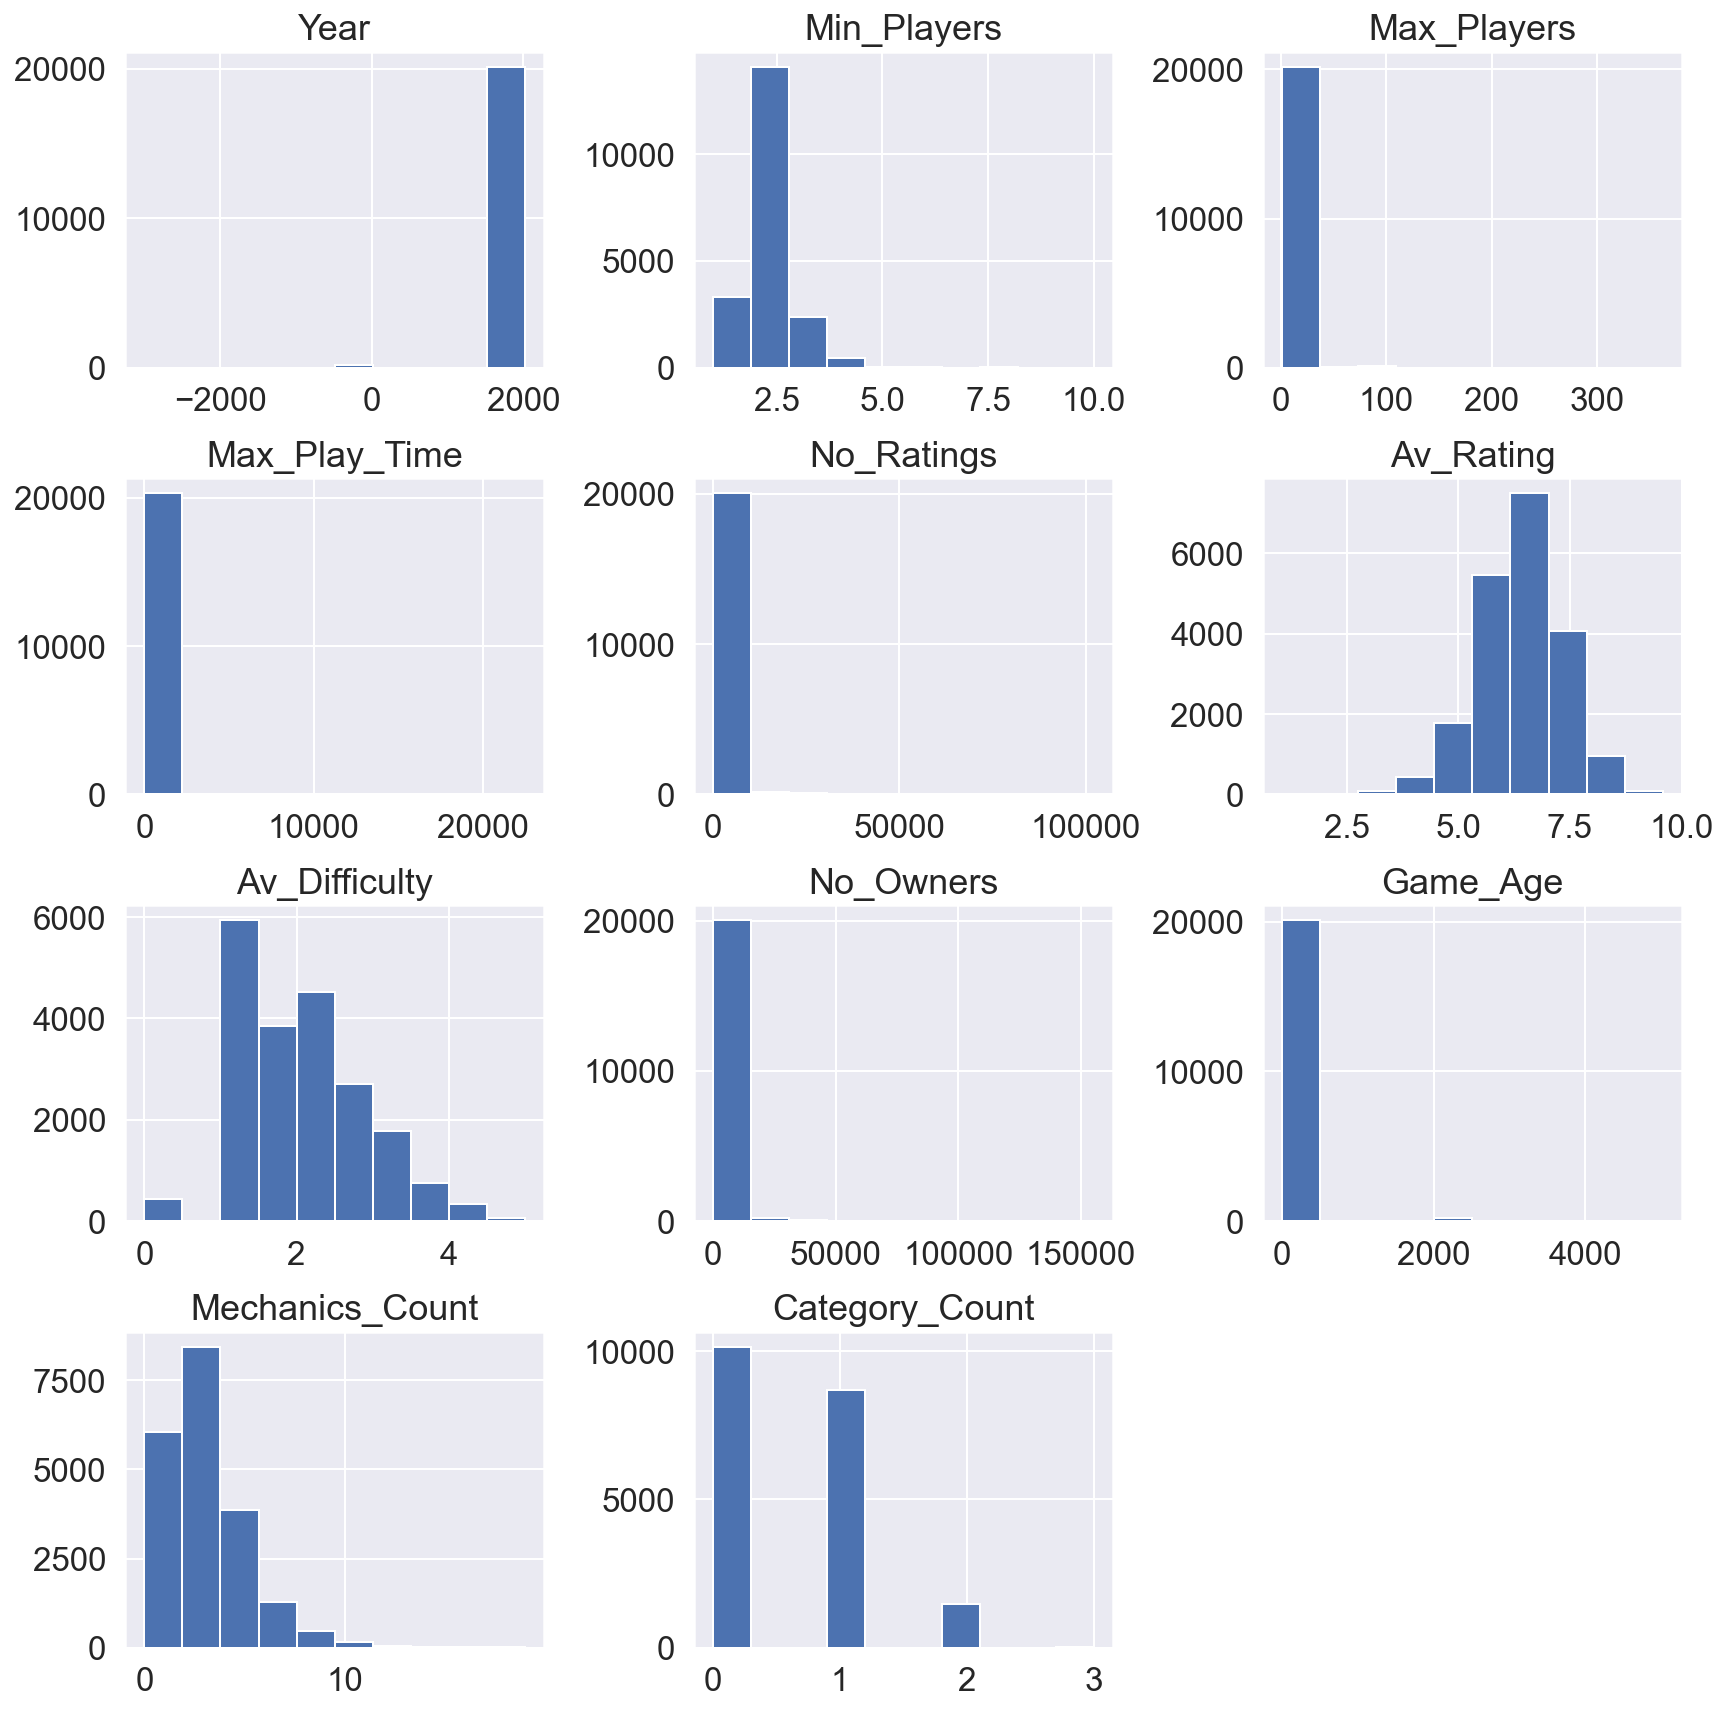

In [96]:
df.hist(figsize=(12, 12))
plt.tight_layout()
plt.show()

Our target, Av_Rating, looks normal, but lets take a closer look.

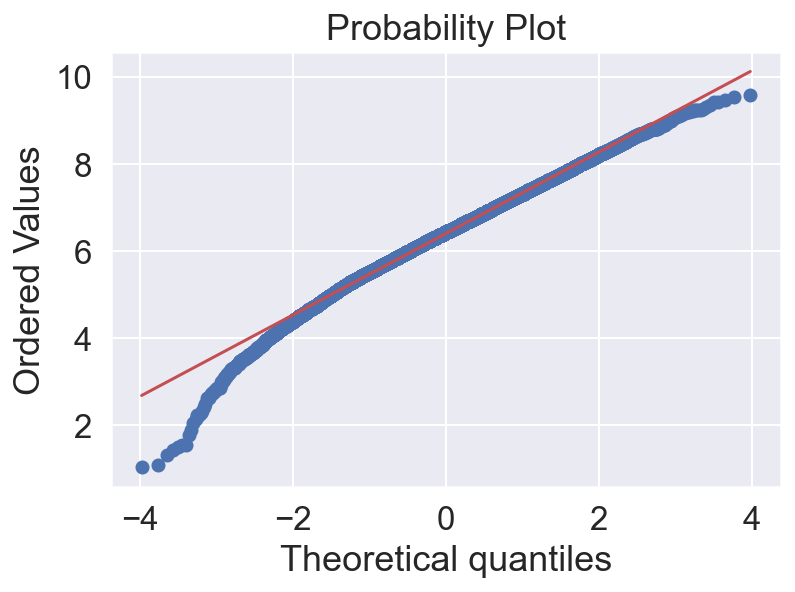

In [97]:
stats.probplot(df['Av_Rating'], dist="norm", plot=pylab)
pylab.show()

As our target value is normally distributed we can use a Linear Regression Model on it further down the line.

#### Distinguish Continuous and Categorical Variables

In [98]:
df.columns

Index(['Name', 'Year', 'Min_Players', 'Max_Players', 'Max_Play_Time',
       'Min_Age', 'No_Ratings', 'Av_Rating', 'Av_Difficulty', 'No_Owners',
       'Mechanics', 'Categories', 'Game_Age', 'Mechanics_Count',
       'Category_Count'],
      dtype='object')

In [99]:
cont_vars = ['Year', 'Min_Players', 'Max_Players', 'Max_Play_Time',
             'No_Ratings', 'Av_Rating', 'Av_Difficulty', 'No_Owners',
             'Game_Age', 'Mechanics_Count', 'Category_Count']

In [100]:
cat_vars = ['Min_Age', 'Mechanics', 'Categories']

### Identify Potential Outliers with Boxplots

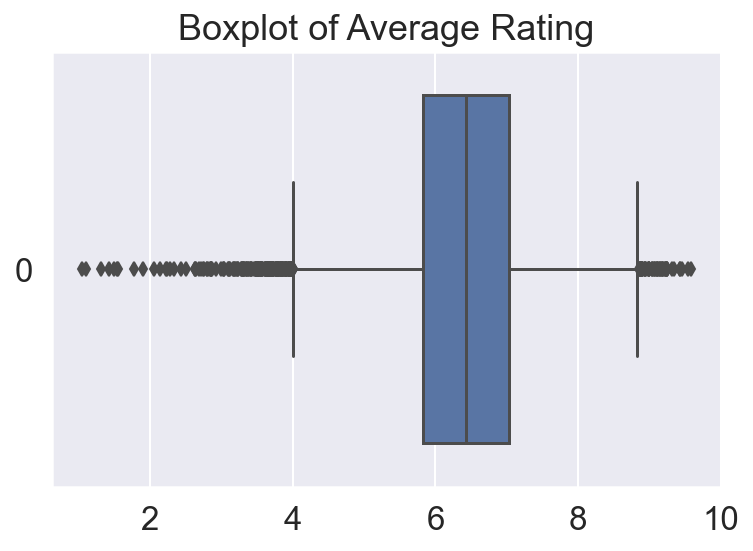

In [101]:
sns.boxplot(data = df.Av_Rating, orient='h')
plt.title('Boxplot of Average Rating')
plt.show()

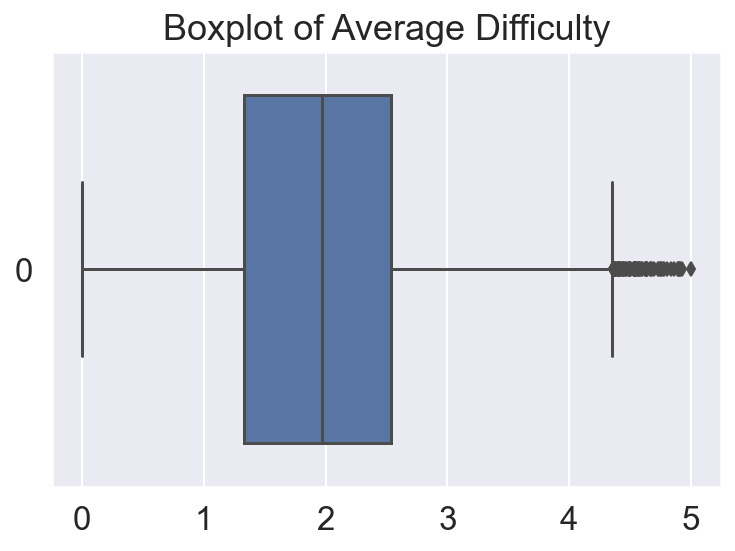

In [102]:
sns.boxplot(data = df.Av_Difficulty, orient='h')
plt.title('Boxplot of Average Difficulty')
plt.show()

Here we see that the average difficulty is around 2 out of 5. Interesting when there is a high correlation between difficulty and rating.

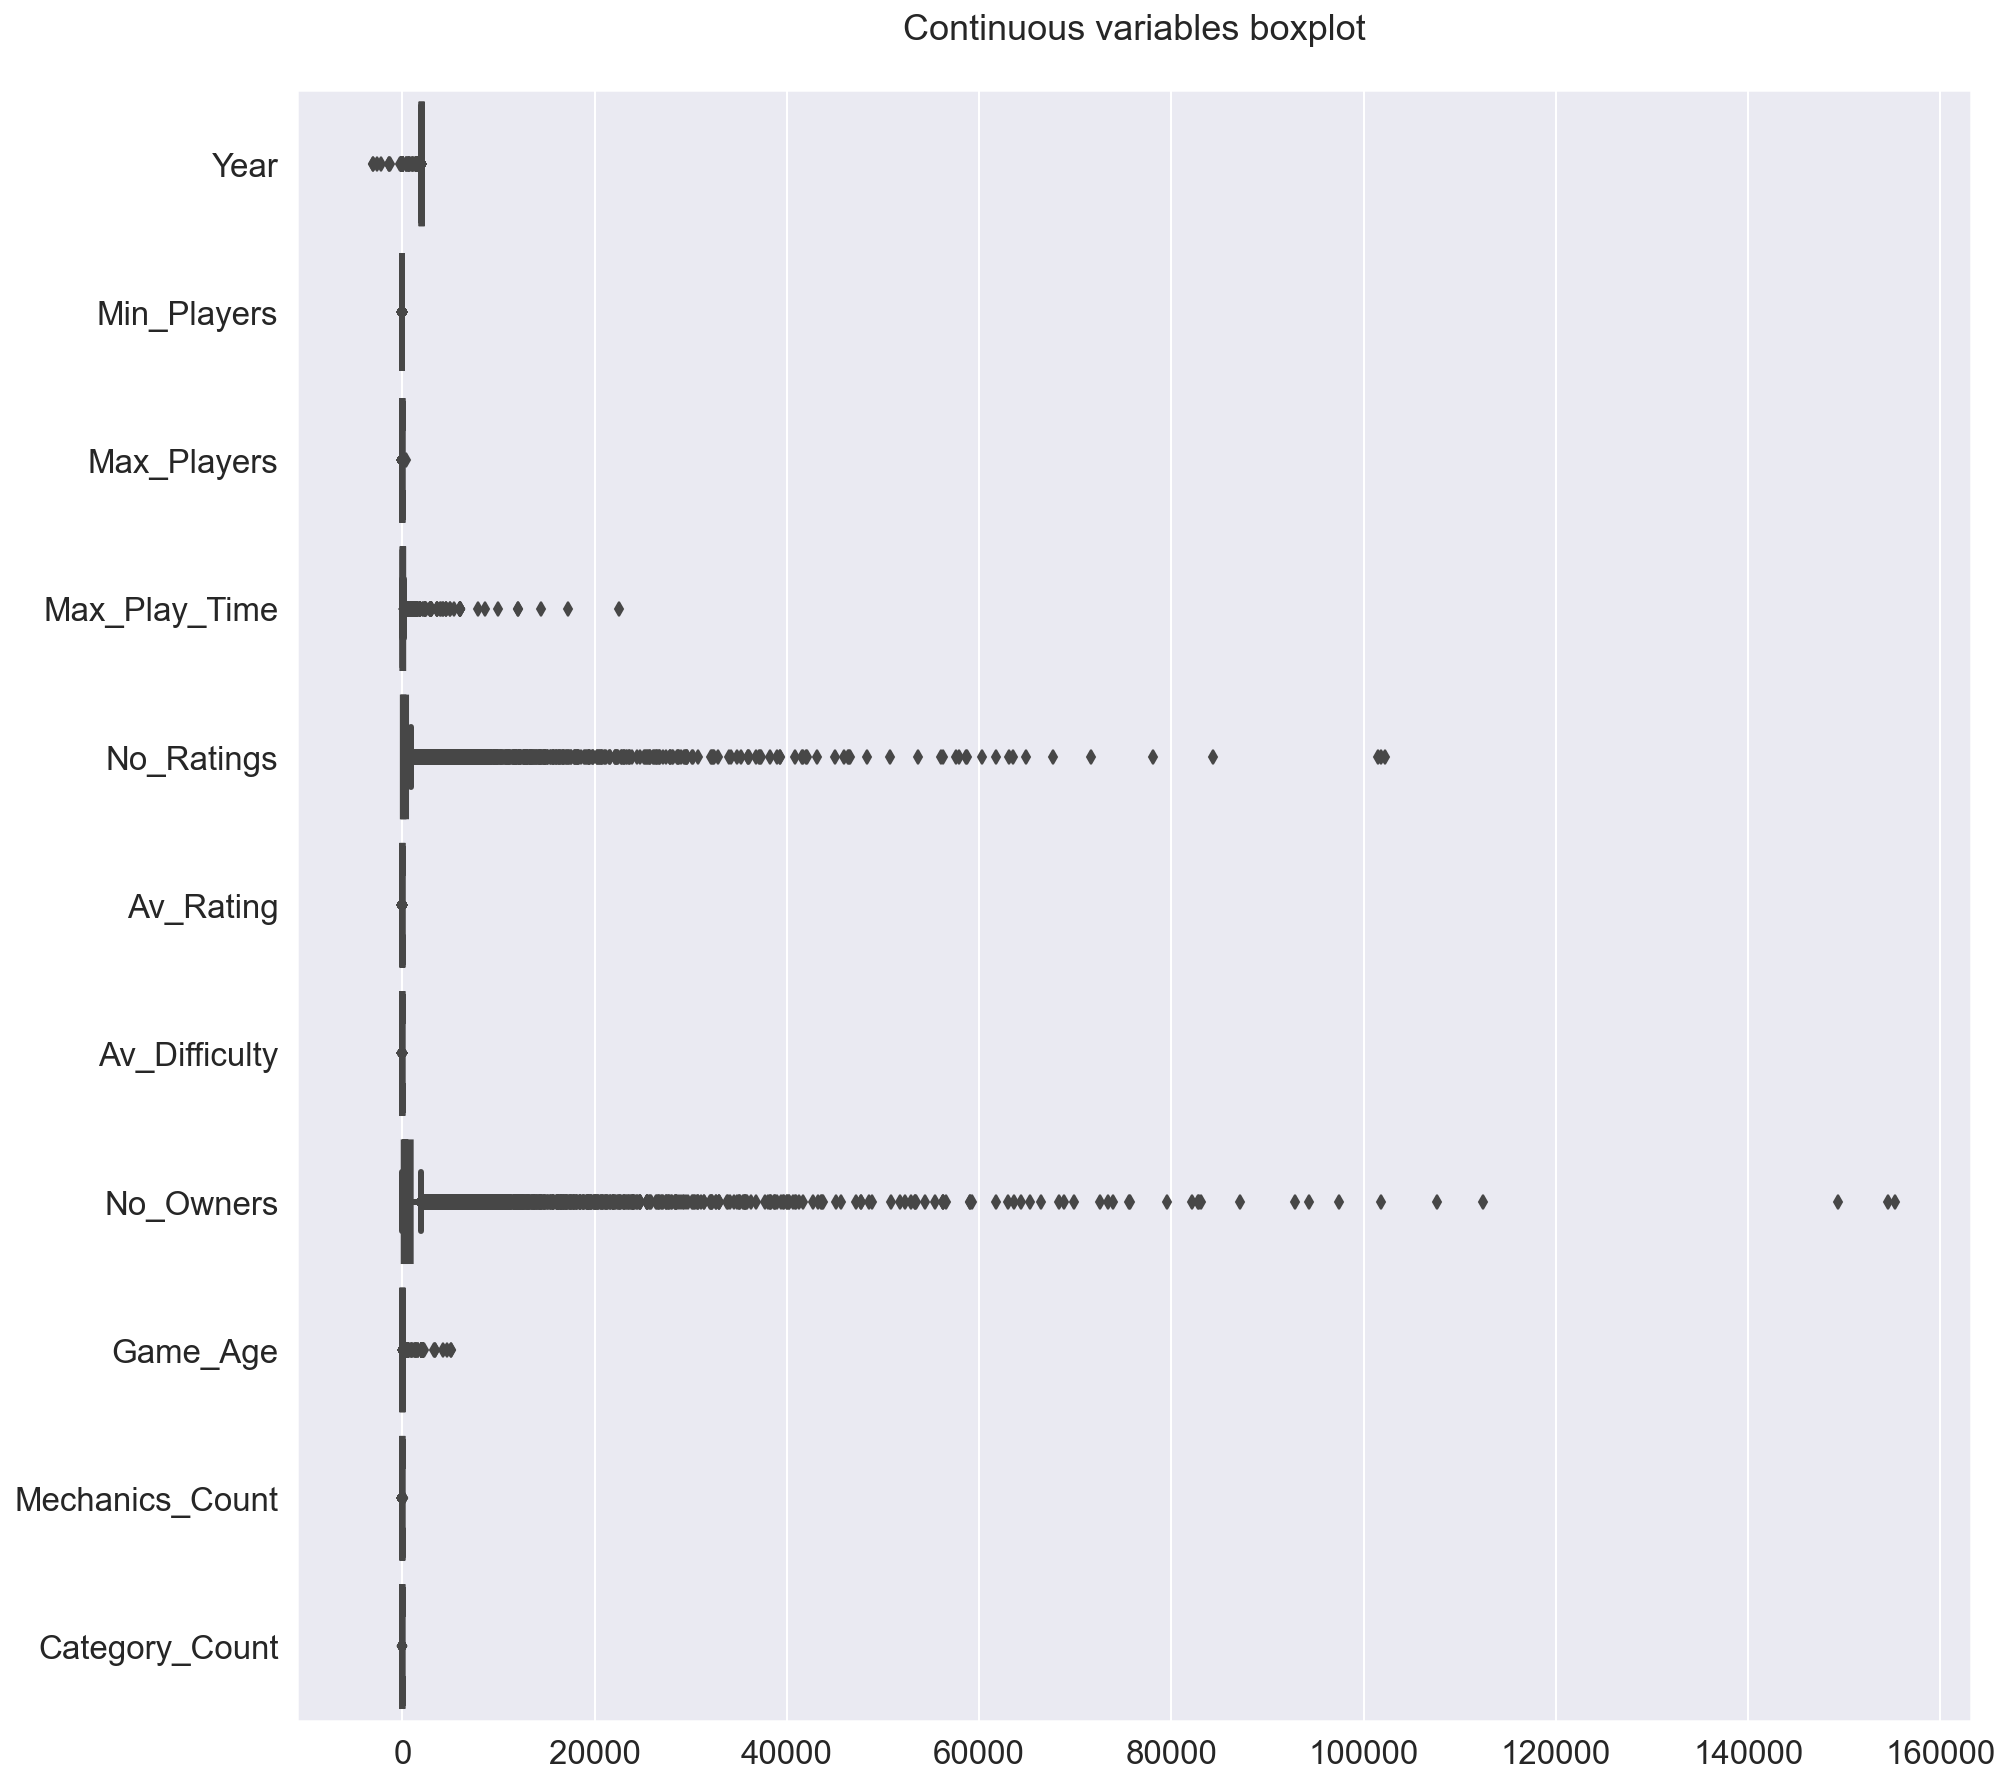

In [103]:
fig, ax = plt.subplots(figsize=(15, 15))

sns.boxplot(data=df[cont_vars], orient='h', fliersize=5, linewidth=3, notch=True,
            saturation=0.5, ax=ax)

ax.set_title('Continuous variables boxplot\n')
plt.show()

In [104]:
len(df)

20341

In [105]:
len(df[df['No_Ratings']>5000])

661

In [106]:
len(df[df['No_Owners']>5000])

1069

In [107]:
len(df[df['Year']<1900])

296

#### Removing Outliers

From the lengths above we can see that the outliers represent a small proportion of the total population so we shall remove some, but not all, to split the difference.

In [108]:
df2 = df[df['No_Ratings']<5000]

In [109]:
df2 = df2[df2['No_Owners']<5000]

In [110]:
df2 = df2[df2['Max_Play_Time']<1000]

In [111]:
df2 = df2[df2['Av_Rating']>3]

In [112]:
df2 = df2[df2['Year']>1900]

In [113]:
df2.shape

(18843, 15)

Above we have shaved off some of outliers:
- Number of ratings
- Number of owners
- Max Play Time
- Average Rating

I was conscious of removing too many outliers because I wanted to have a large sample size still.

### Correlation Matrix

This will give us the Spearman Rank Coefficient between each continuous variable pair.

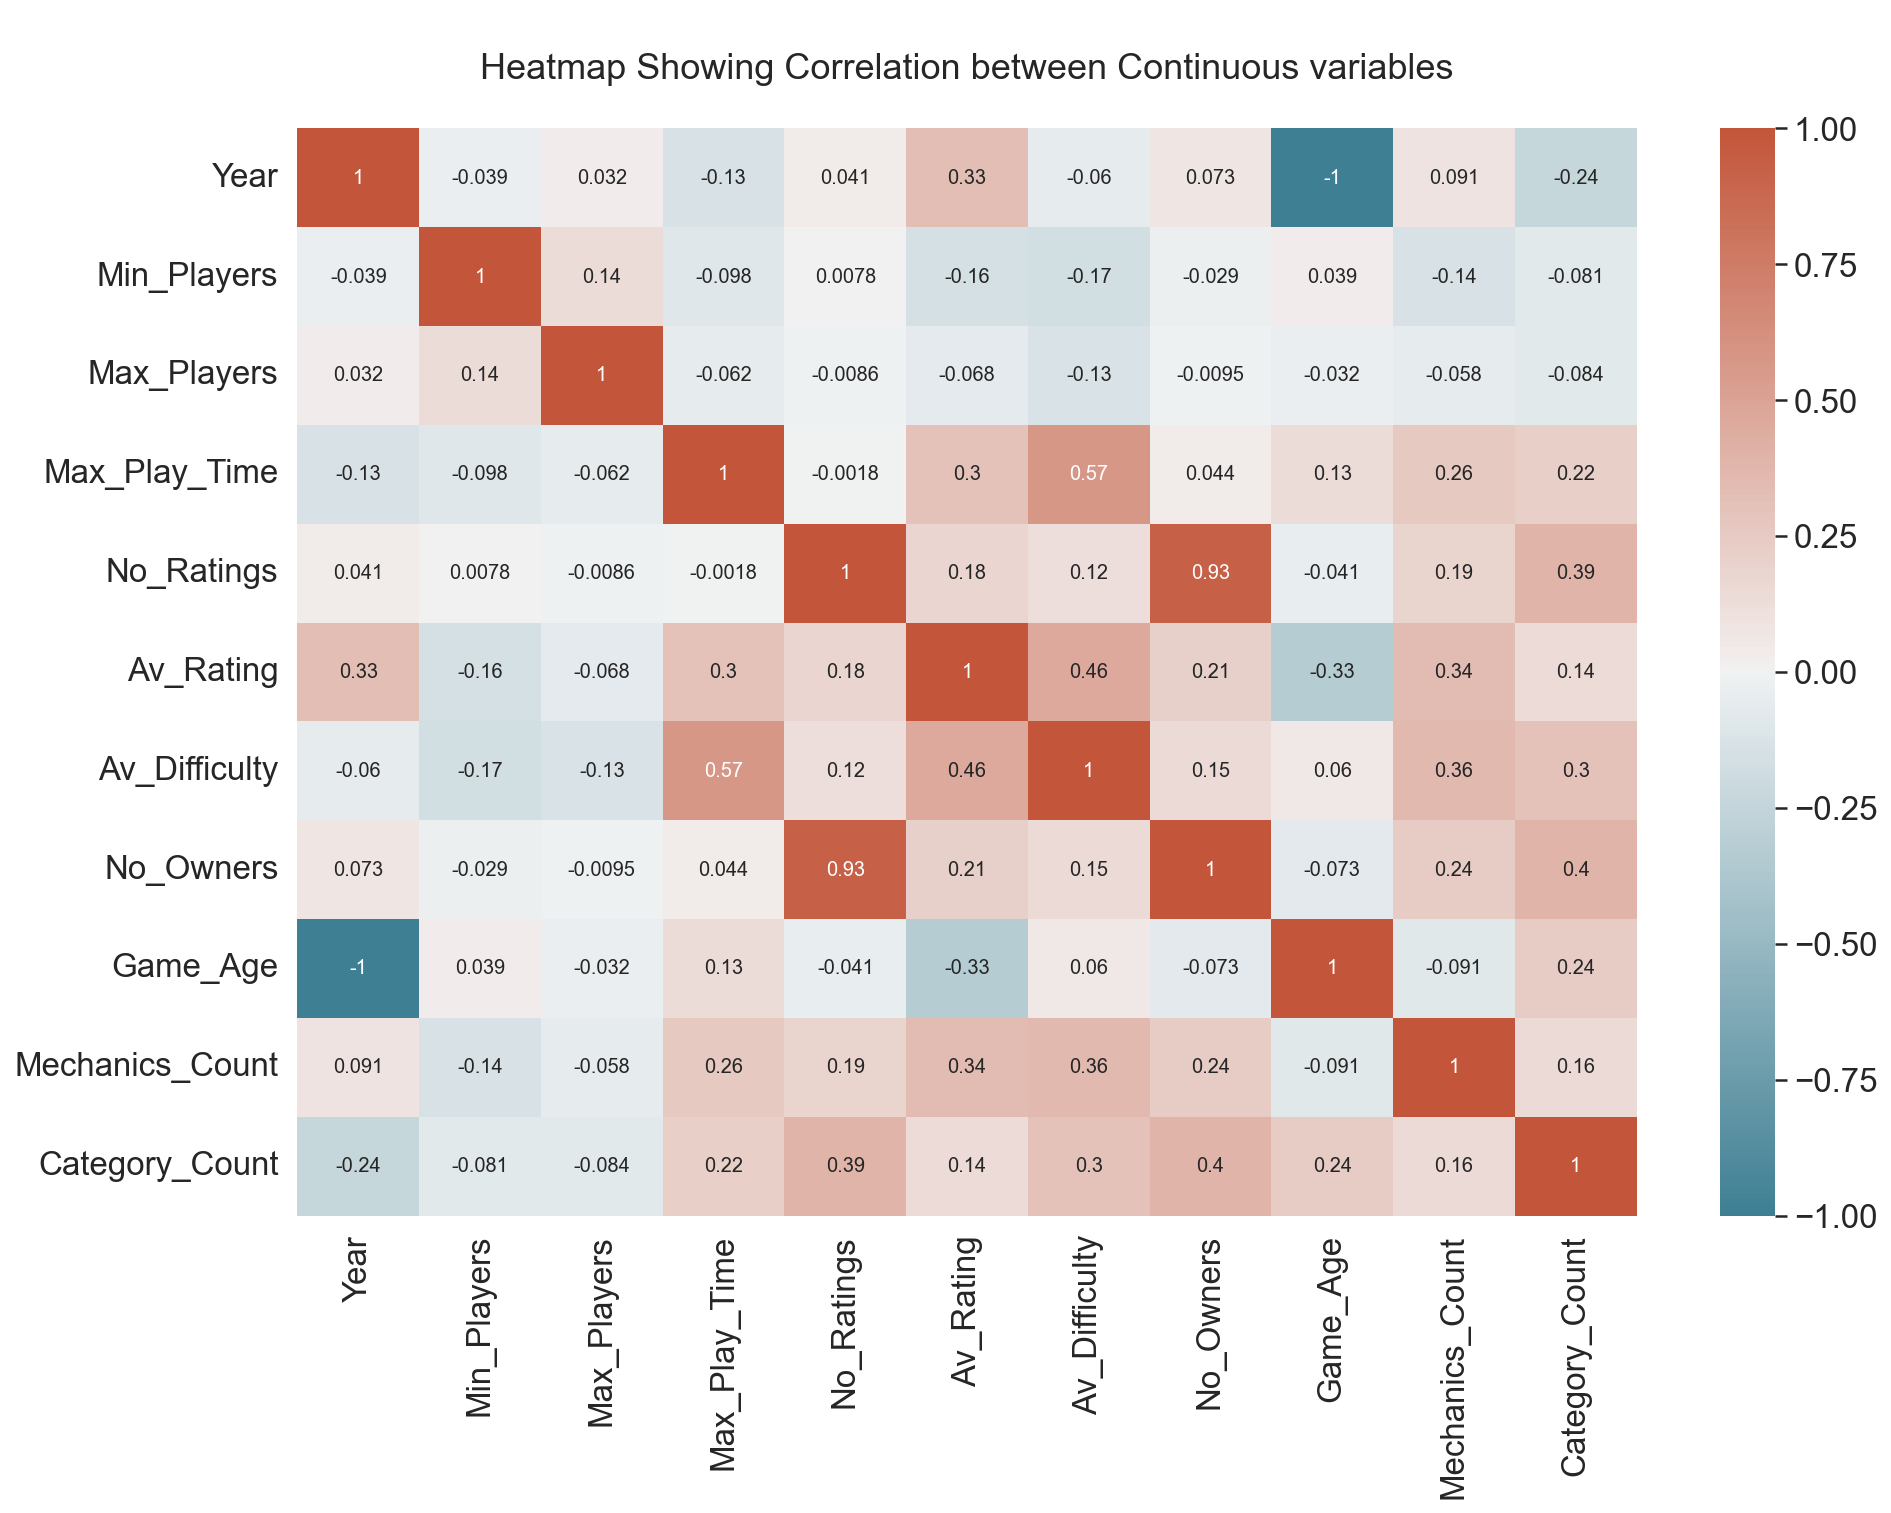

In [114]:
corr = df2.corr()
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('\nHeatmap Showing Correlation between Continuous variables\n')
plt.show()

We can see that a couple of variables are correlated:
- Year and 'Game Age (negatively)
- Number of Ratings and Number of Owners
- Average Difficulty and Max Play Time
- Average Rating and Average Difficulty

As year vs age and Number of Ratings vs Number of Owners are both very strongly correlated, when it comes to the model, Year and number of owners could either be potentially dropped, or their impact limited using a model such as Ridge Regression.

### Scatter Plots

In [115]:
# sns.pairplot(df2)
# plt.show()

From the Correlation matrix we can see that the Average Difficulty has the greatest correlation with the Average Rating

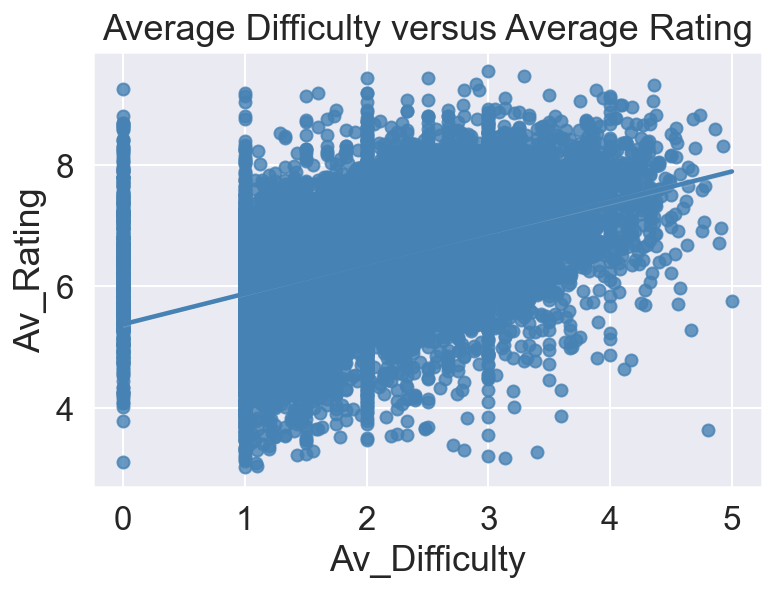

In [116]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.regplot(x='Av_Difficulty', y='Av_Rating', data=df2, 
            fit_reg=True,
            color='steelblue', ax=ax)

ax.set_title('Average Difficulty versus Average Rating')
plt.show()

People seem to enjoy difficult games more!

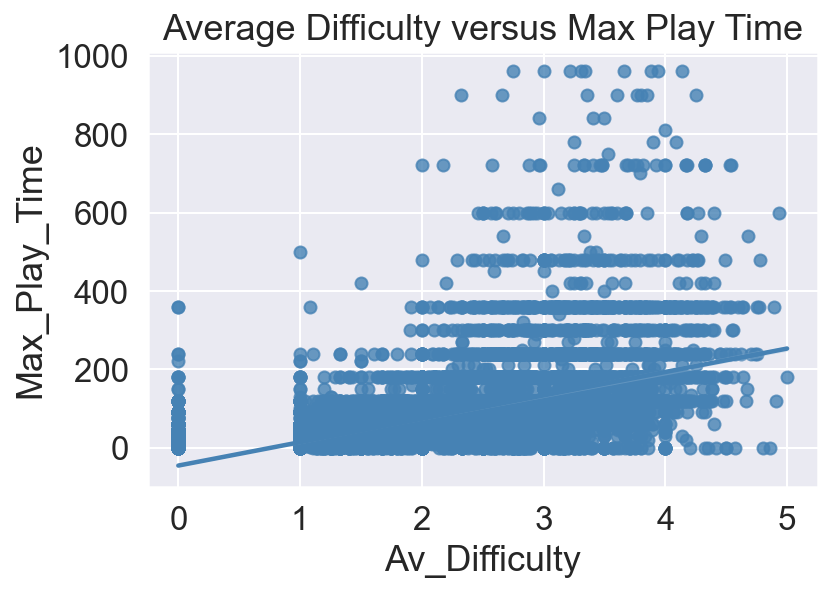

In [117]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.regplot(x='Av_Difficulty', y='Max_Play_Time', data=df2, 
            fit_reg=True,
            color='steelblue', ax=ax)

ax.set_title('Average Difficulty versus Max Play Time')
plt.show()

### More Detailed Look at Categories and Mechanics

The longer the game the more complex it is! (Unlike Monopoly, which I find to be quite monotonous)

We can also take a look at the distribution of Mechanics and Categories

In [118]:
def get_elements(data):
    """
    Create a list of all the mechanics or categories recorded in the mechanics column.
    """
    m = []
    for row in data:
        item = row.split(', ')
        m += item
    return m

In [119]:
mechanics_list = get_elements(df.Mechanics)
mechanics_list[:5]

['Action Queue',
 'Action Retrieval',
 'Campaign / Battle Card Driven',
 'Card Play Conflict Resolution',
 'Communication Limits']

In [120]:
mechanics_dict = dict([(x, mechanics_list.count(x)) for x in set(mechanics_list)])

In [121]:
categories_list = get_elements(df.Categories)

In [122]:
categories_dict = dict([(x, categories_list.count(x)) for x in set(categories_list)])

In [123]:
categories_dict = {k: v for k, v in sorted(categories_dict.items(), key=lambda item: item[1], reverse=True)}

In [124]:
categories_dict = {
 'Wargames': 3315,
 'Strategy': 2205,
 'Family': 2173,
 'Thematic': 1174,
 'Abstract': 1069,
 "Children's": 849,
 'Party': 605,
 'Customizable': 297}

In [125]:
print('There are', len(mechanics_dict.keys()) -1 , 'unique mechanics')
print('There are', len(categories_dict.keys()) , 'unique categories')

There are 182 unique mechanics
There are 8 unique categories


In [126]:
mechanics_df = pd.DataFrame.from_dict(mechanics_dict, orient='index')

In [127]:
mechanics_df.sort_values(0, ascending=False, inplace=True)

In [128]:
mechanics_df.head(10)

,0
Dice Rolling,5670
Hand Management,4152
Set Collection,2733
Variable Player Powers,2534
Hexagon Grid,2252
Simulation,1943
Card Drafting,1730
Tile Placement,1692
Modular Board,1623
No Mechanics,1598


Create A Dictionary of the sorted values

In [129]:
mechanics_dict_top = {
    
    'Dice Rolling':5670,
    'Hand Management':4152,
    'Set Collection':2733,
    'Variable Player Powers':2534,
    'Hexagon Grid':2252,
    'Simulation':1943,
    'Card Drafting':1730,
    'Tile Placement':1692,
    'Modular Board':1623
    
}

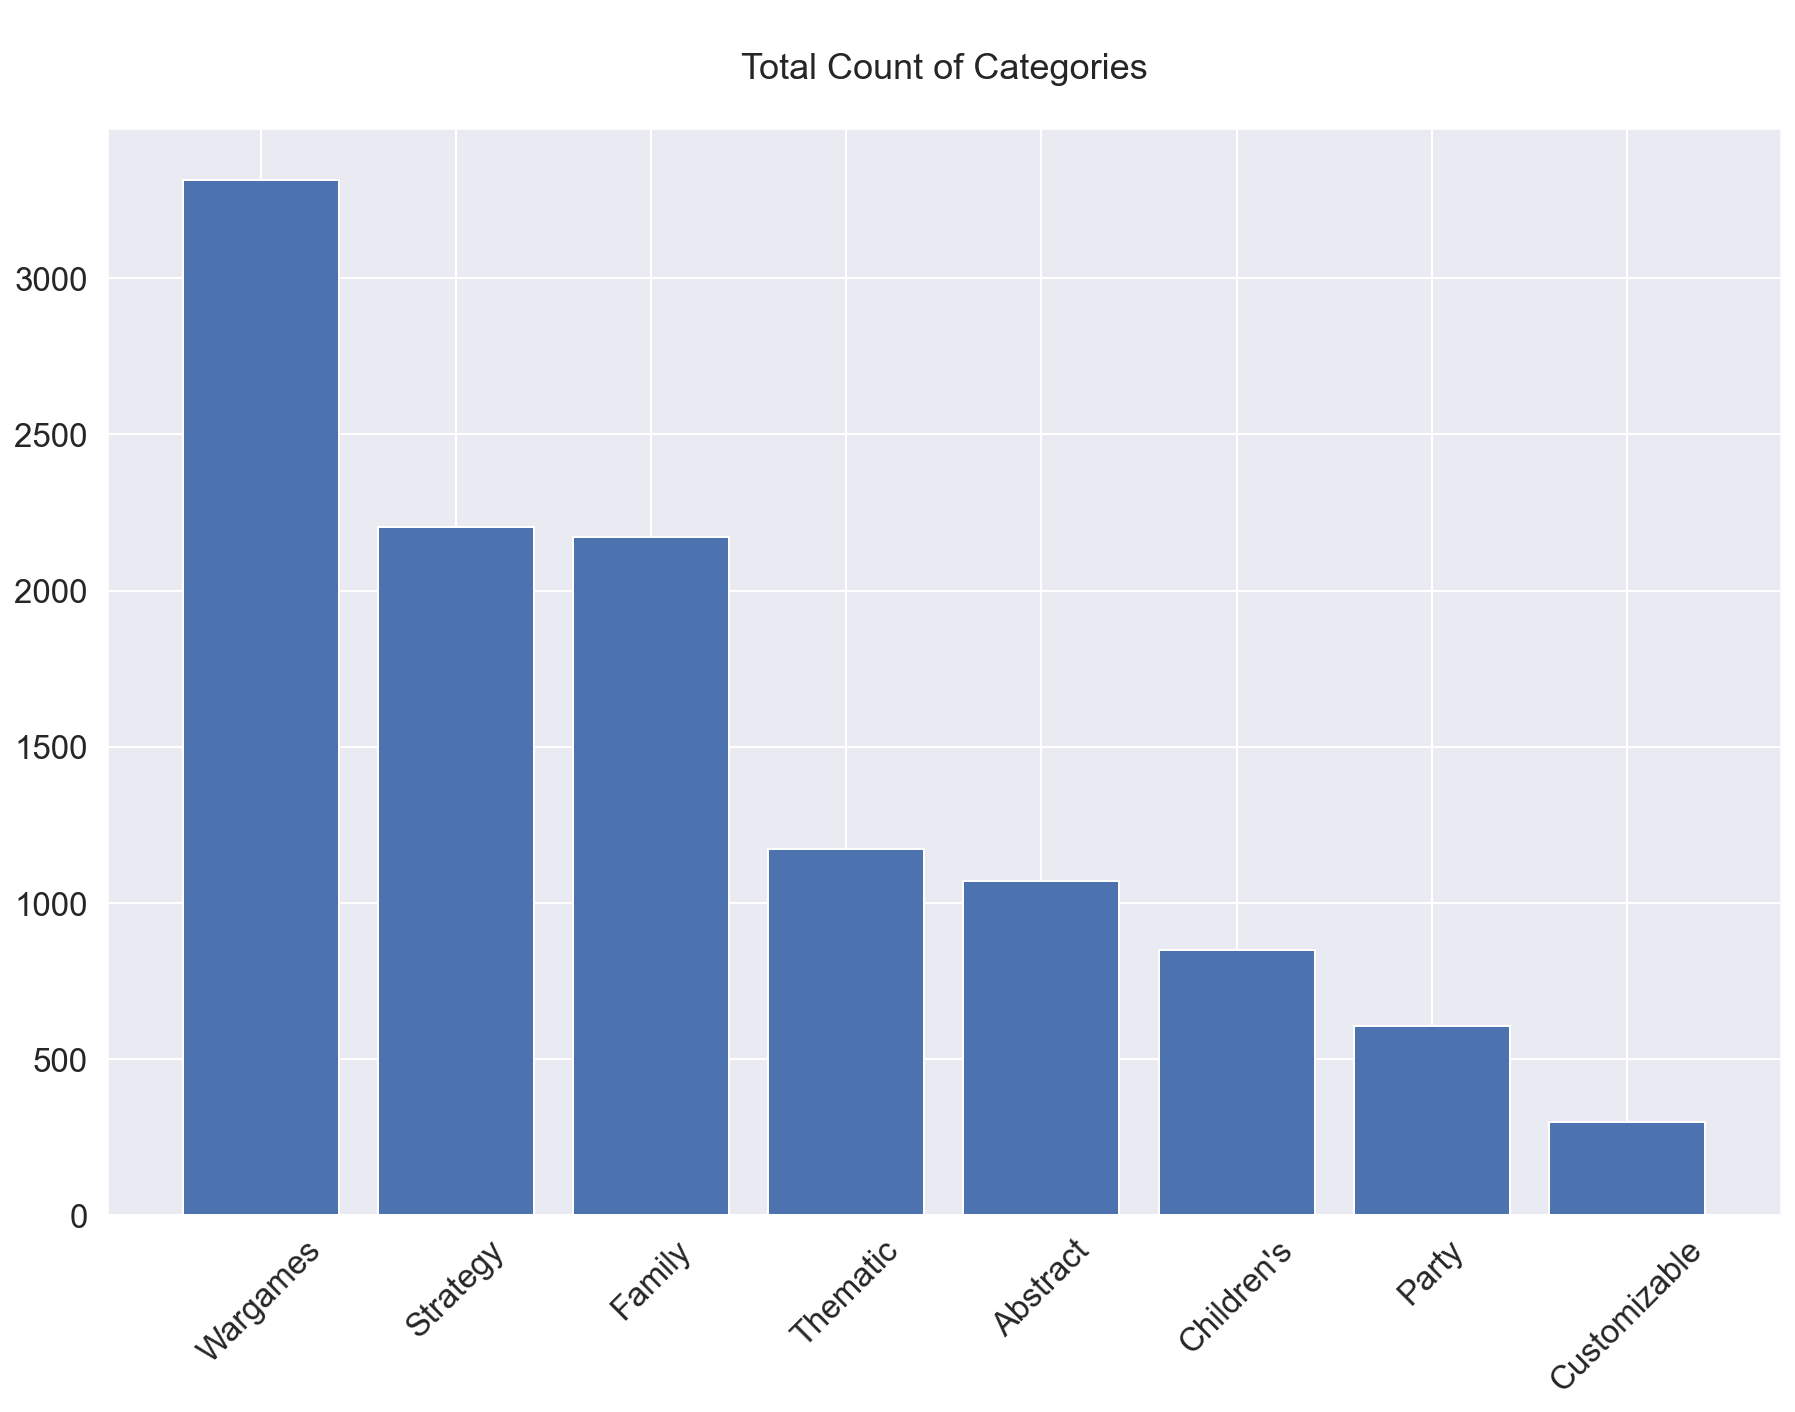

In [130]:
names = list(categories_dict.keys())
values = list(categories_dict.values())
fig, ax = plt.subplots(figsize=(15,10)) 
plt.bar(range(len(categories_dict)), values, tick_label=names)
plt.xticks(rotation=45)
plt.title('\nTotal Count of Categories\n')
plt.show()

From this we can see that most games do not actually have an assigned category! Besides that the next most popular ones are Wargames, Family and Strategy.

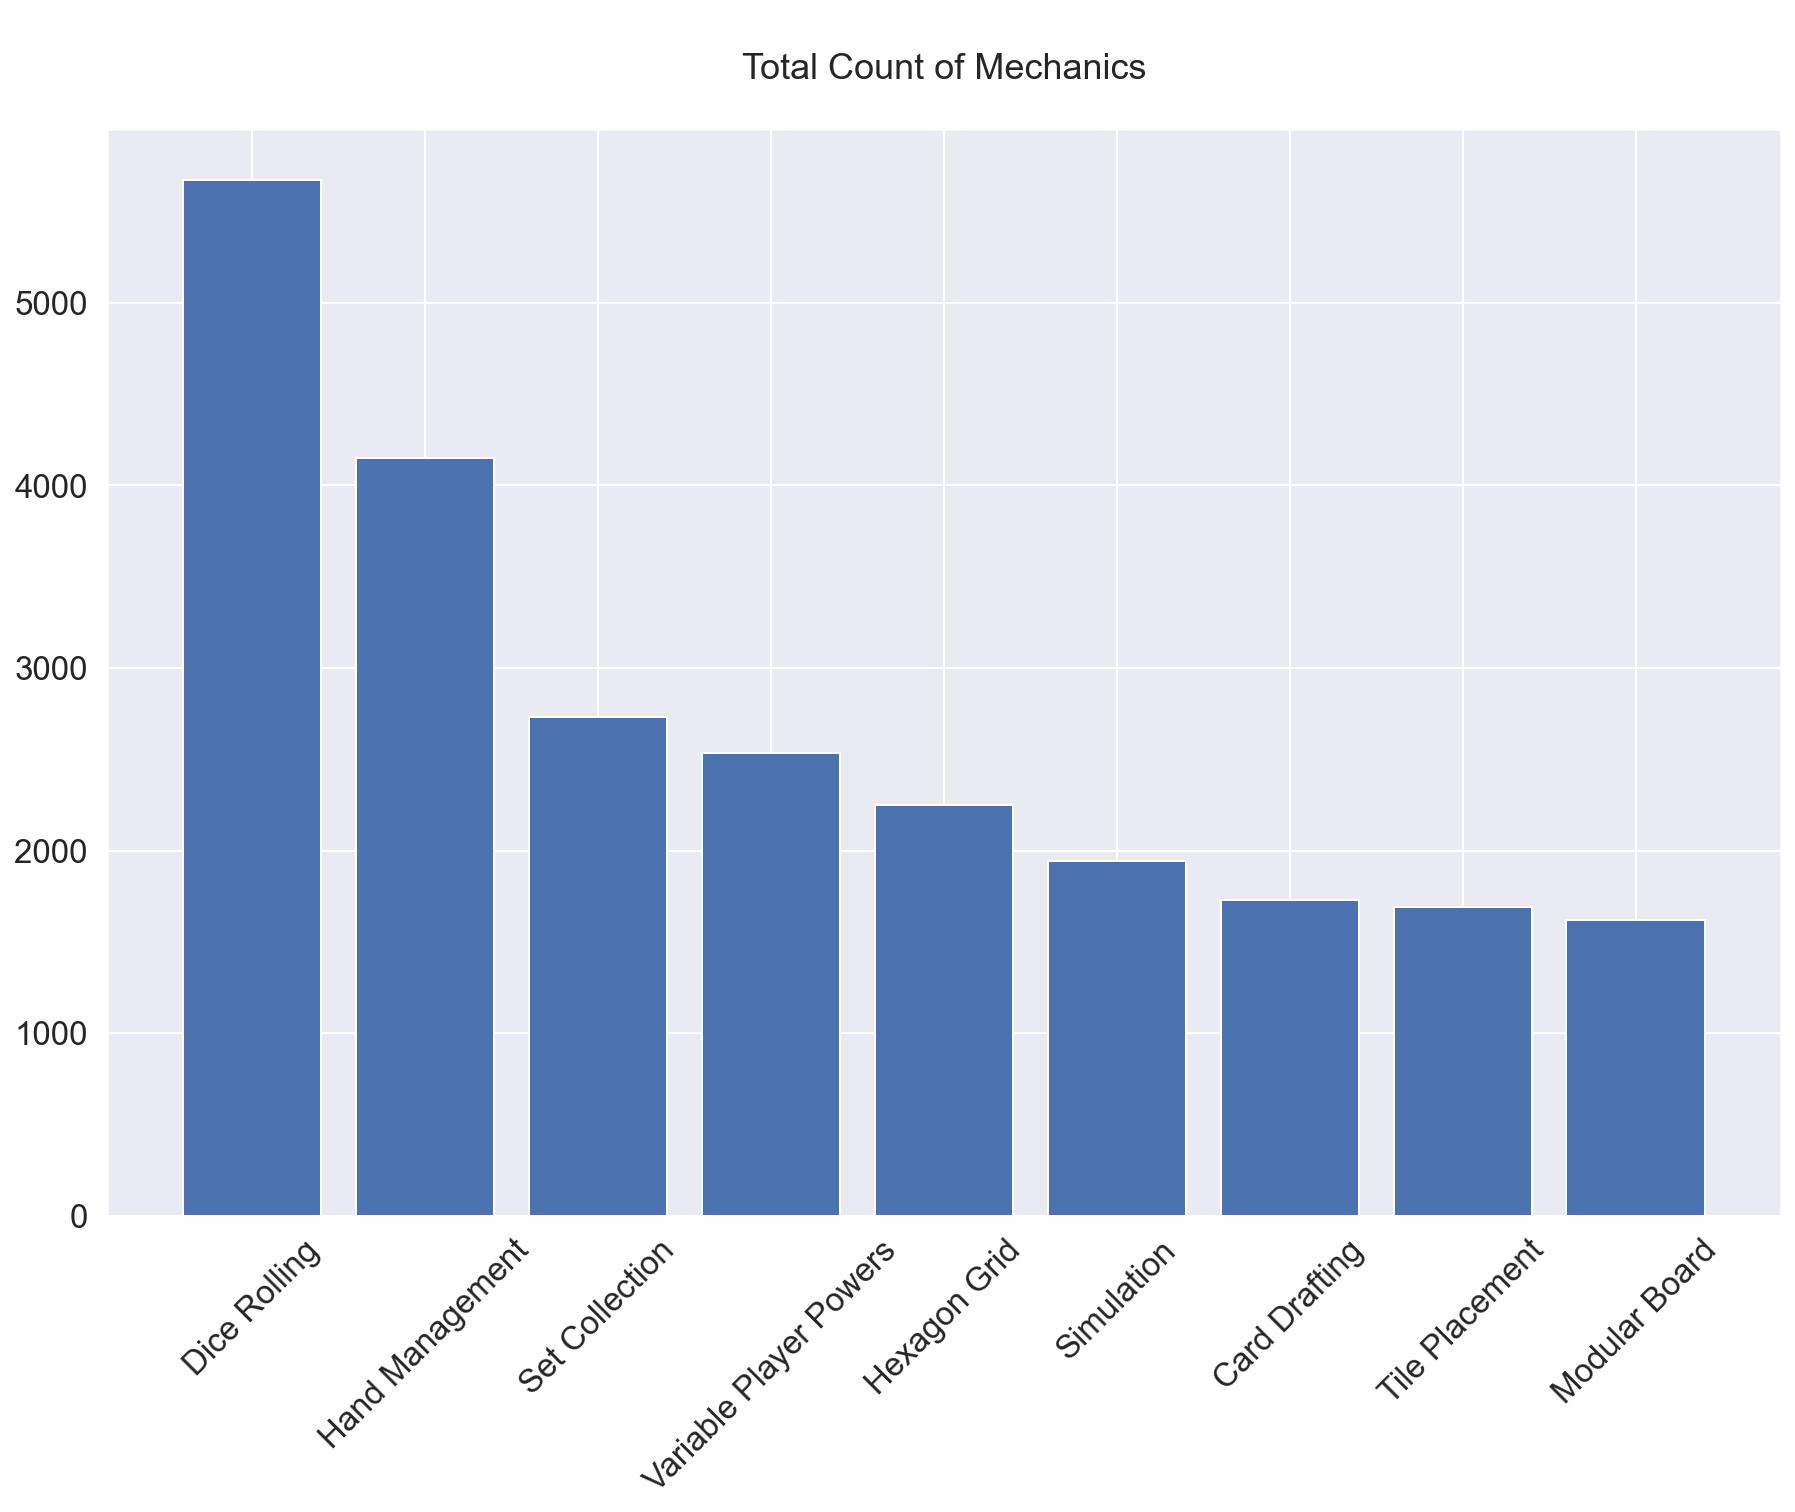

In [131]:
names = list(mechanics_dict_top.keys())
values = list(mechanics_dict_top.values())
fig, ax = plt.subplots(figsize=(15,10)) 
plt.bar(range(len(mechanics_dict_top)), values, tick_label=names)
plt.xticks(rotation=45)
plt.title('\nTotal Count of Mechanics\n')
plt.show()

It would seem that humans haven't moved away from Dice and Cards in our history! Over a Quarter of the games had a Dice Rolling Mechanic in them.

## EDA Summary

There were several interesting things that came out of the EDA:
- A game that is over 5000 years old
- A game that aims to recreate the events of a war in real time (lasting 40 days)
- There are 'only' 8 categories of Games but 182 unique mechanics, certainly a lot of ways to roll dice and play cards.
- Wargames are the most popular Category while Dice Rolling reigns supreme in Mechanics.
- People enjoy more difficult games, with there being a higher correlation between Difficulty and Rating.
- But a more difficult game means a longer one! Probably taking all that time to learn the rules!

After initial looks at the variables, the ones that seemed the most relevant were Average Difficulty and Max Play Time, I wanted to see what their eventual importance would be in the models.

I decided to balance the removal of outliers, I was mindful not to remove  too many, because I wanted to still have a nice set of predictors for my models, therefore I removed the most extreme ones, which equated to around 2000 being removed overall. I saved this new set as I was interested to see which would have a greater model score, the dataset with the outliers but greater number of predictors, or the dataset with fewer outliers, but also smaller number of predictors.

Imputation was required for some Columns, for Min Players it was just a case of replacing 0 values with 1. It was slightly trickier for the maximum number of players, I decided the best practice would be to replace those with the mean. Initially I did this before I dealt with outliers, and this had the consequence of having an average max of 7! After removing the outermost outliers this dropped down to 5!

-----

# Modelling

## Setup

### Importing Libraries

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

### Finding a Baseline

We want a baseline that we can compare our results to, since I am interested in the impact that the presence of outliers could have, I will evaluate two different data frames.

In [133]:
print("Data with outliers: ", round(df.Av_Rating.mean(), 3))
print("Data with some outliers removed: ", round(df2.Av_Rating.mean(), 3))

Data with outliers:  6.403
Data with some outliers removed:  6.367


### Getting Dummies

As it was my only categorical predictor, I got dummies for the minimum age column.

In [134]:
df_dum = pd.get_dummies(df, columns=['Min_Age'], drop_first=True)

In [135]:
df2_dum = pd.get_dummies(df2, columns=['Min_Age'], drop_first=True)

### Creating a Pipeline

Create a pipeline so that each instance of variables can be carried out quickly.

I have decided to use four different models to attempt to predict the Average Rating:
- Linear Regression (our target is normally distributed so this is viable)
- Ridge Regression, as I want to try predictor instances that have multicollinearity, this will compensate that by reducing their importance.
- Decision Tree Regressor.
- Random Forest Regressor.

In [136]:
lr_pipe = Pipeline([("scalar1",StandardScaler()),
                      ("LR",LinearRegression())])

ri_pipe = Pipeline([("scalar2",StandardScaler()),
                      ("RI",Ridge())])

dt_pipe = Pipeline([("scalar3",StandardScaler()),
                      ("DT",DecisionTreeRegressor())])

rf_pipe = Pipeline([("scalar4",StandardScaler()),
                      ("RF",RandomForestRegressor())])


pipe_dict = {0: "LinearRegression", 1: "Ridge", 2: "DecisionTree", 3: "RandomForest"}

pipelines = [lr_pipe, ri_pipe, dt_pipe, rf_pipe]

## Model Fitting

I decided to create several different model instances, so that I could compare which combinations of predictors made for the best score.

The performance will be evaluated by comparing the mean cross validated score for each instance.

### Models using predictors with fewer outliers

#### Without Multicollinearity and with Dummy Variables and Fewer Outliers

In [137]:
df2_dum.columns

Index(['Name', 'Year', 'Min_Players', 'Max_Players', 'Max_Play_Time',
       'No_Ratings', 'Av_Rating', 'Av_Difficulty', 'No_Owners', 'Mechanics',
       'Categories', 'Game_Age', 'Mechanics_Count', 'Category_Count',
       'Min_Age_1', 'Min_Age_2', 'Min_Age_3', 'Min_Age_4', 'Min_Age_5',
       'Min_Age_6', 'Min_Age_7', 'Min_Age_8', 'Min_Age_9', 'Min_Age_10',
       'Min_Age_11', 'Min_Age_12', 'Min_Age_13', 'Min_Age_14', 'Min_Age_15',
       'Min_Age_16', 'Min_Age_17', 'Min_Age_18', 'Min_Age_21', 'Min_Age_25'],
      dtype='object')

In [138]:
X = df2_dum[
    
    ['Min_Players', 'Max_Players', 'Max_Play_Time',
     'Av_Rating', 'Av_Difficulty', 'No_Owners',
     'Game_Age', 'Mechanics_Count', 'Category_Count',
     'Min_Age_1', 'Min_Age_2', 'Min_Age_3', 'Min_Age_4',
     'Min_Age_5', 'Min_Age_6', 'Min_Age_7', 'Min_Age_8', 'Min_Age_9',
     'Min_Age_10', 'Min_Age_11', 'Min_Age_12', 'Min_Age_13', 'Min_Age_14',
     'Min_Age_15', 'Min_Age_16', 'Min_Age_17', 'Min_Age_18', 'Min_Age_21',
     'Min_Age_25']
    
].copy()
y = X.pop('Av_Rating')

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [140]:
for pipe in pipelines:
    pipe.fit(X_train, y_train)

cv_result = []
for i, model in enumerate(pipelines):
    
    # a kfold split will be useful as this is a large data set and this will ensure all the data splits are the same    
    kfold = KFold(n_splits=10)
    cv_score = cross_val_score(model, X_train, y_train, cv=kfold)
    cv_result.append(cv_score)
    
    # '%' here is string formatting syntax that allows us to call the name of the model as a string.
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: 0.393600 
Ridge: 0.393600 
DecisionTree: 0.028144 
RandomForest: 0.504248 


#### With Multicollinearity and with Dummy Variables and Fewer Outliers

In [141]:
X1 = df2_dum[
    
    ['Year', 'Min_Players', 'Max_Players', 'Max_Play_Time',
     'No_Ratings', 'Av_Rating', 'Av_Difficulty', 'No_Owners',
     'Game_Age', 'Mechanics_Count', 'Category_Count',
     'Min_Age_1', 'Min_Age_2', 'Min_Age_3', 'Min_Age_4',
     'Min_Age_5', 'Min_Age_6', 'Min_Age_7', 'Min_Age_8', 'Min_Age_9',
     'Min_Age_10', 'Min_Age_11', 'Min_Age_12', 'Min_Age_13', 'Min_Age_14',
     'Min_Age_15', 'Min_Age_16', 'Min_Age_17', 'Min_Age_18', 'Min_Age_21',
     'Min_Age_25']
    
].copy()
y1 = X1.pop('Av_Rating')

In [142]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state=2)

In [143]:
for pipe in pipelines:
    pipe.fit(X1_train, y1_train)

cv_result = []
for i, model in enumerate(pipelines):
    kfold = KFold(n_splits=10)
    cv_score = cross_val_score(model, X1_train, y1_train, cv=kfold)
    cv_result.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: 0.394493 
Ridge: 0.394494 
DecisionTree: 0.068463 
RandomForest: 0.524673 


From the results above, the models that performed better included the features with multicollinearity, so I continued including them.

### Models using predictors with all outliers

#### With multicollinearity and no dummy variables:

In [144]:
df.columns

Index(['Name', 'Year', 'Min_Players', 'Max_Players', 'Max_Play_Time',
       'Min_Age', 'No_Ratings', 'Av_Rating', 'Av_Difficulty', 'No_Owners',
       'Mechanics', 'Categories', 'Game_Age', 'Mechanics_Count',
       'Category_Count'],
      dtype='object')

In [145]:
X2 = df[
    [
    'Year', 'Min_Players', 'Max_Players', 'Max_Play_Time',
    'Min_Age', 'No_Ratings', 'Av_Rating', 'Av_Difficulty', 'No_Owners',
    'Game_Age', 'Mechanics_Count',
    'Category_Count'
    ]
].copy()

In [146]:
y2 = X2.pop('Av_Rating')

In [147]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state=1)

In [148]:
for pipe in pipelines:
    pipe.fit(X2_train, y2_train)

cv_result = []
for i, model in enumerate(pipelines):
    kfold = KFold(n_splits=10)
    cv_score = cross_val_score(model, X2_train,y2_train, cv=kfold)
    cv_result.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: 0.288002 
Ridge: 0.288098 
DecisionTree: 0.105280 
RandomForest: 0.547931 


#### With multicollinearity and dummy variables:

In [149]:
df_dum.columns

Index(['Name', 'Year', 'Min_Players', 'Max_Players', 'Max_Play_Time',
       'No_Ratings', 'Av_Rating', 'Av_Difficulty', 'No_Owners', 'Mechanics',
       'Categories', 'Game_Age', 'Mechanics_Count', 'Category_Count',
       'Min_Age_1', 'Min_Age_2', 'Min_Age_3', 'Min_Age_4', 'Min_Age_5',
       'Min_Age_6', 'Min_Age_7', 'Min_Age_8', 'Min_Age_9', 'Min_Age_10',
       'Min_Age_11', 'Min_Age_12', 'Min_Age_13', 'Min_Age_14', 'Min_Age_15',
       'Min_Age_16', 'Min_Age_17', 'Min_Age_18', 'Min_Age_21', 'Min_Age_25'],
      dtype='object')

In [150]:
X3 = df_dum[
    
    ['Year', 'Min_Players', 'Max_Players', 'Max_Play_Time',
     'No_Ratings', 'Av_Rating', 'Av_Difficulty', 'No_Owners',
     'Game_Age', 'Mechanics_Count', 'Category_Count',
     'Min_Age_1', 'Min_Age_2', 'Min_Age_3', 'Min_Age_4',
     'Min_Age_5', 'Min_Age_6', 'Min_Age_7', 'Min_Age_8', 'Min_Age_9',
     'Min_Age_10', 'Min_Age_11', 'Min_Age_12', 'Min_Age_13', 'Min_Age_14',
     'Min_Age_15', 'Min_Age_16', 'Min_Age_17', 'Min_Age_18', 'Min_Age_21',
     'Min_Age_25']
    
].copy()
y3 = X3.pop('Av_Rating')

In [151]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.2, random_state=1)

In [152]:
for pipe in pipelines:
    pipe.fit(X3_train, y3_train)

cv_result = []
for i, model in enumerate(pipelines):
    kfold = KFold(n_splits=10)
    cv_score = cross_val_score(model, X3_train, y3_train, cv=kfold)
    cv_result.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -59327960306929041408.000000 
Ridge: 0.305968 
DecisionTree: 0.112540 
RandomForest: 0.547616 


#### Without predictors that wouldn't be available for new games:

As the predictors; Number of Owners and Number of Ratings would not be available to us in a business scenario, a final model has been created to reflect this.

In [153]:
X4 = df_dum[
    
    ['Year', 'Min_Players', 'Max_Players', 'Max_Play_Time',
     'Av_Rating', 'Av_Difficulty',
     'Game_Age', 'Mechanics_Count', 'Category_Count',
     'Min_Age_1', 'Min_Age_2', 'Min_Age_3', 'Min_Age_4',
     'Min_Age_5', 'Min_Age_6', 'Min_Age_7', 'Min_Age_8', 'Min_Age_9',
     'Min_Age_10', 'Min_Age_11', 'Min_Age_12', 'Min_Age_13', 'Min_Age_14',
     'Min_Age_15', 'Min_Age_16', 'Min_Age_17', 'Min_Age_18', 'Min_Age_21',
     'Min_Age_25']
    
].copy()
y4 = X4.pop('Av_Rating')

In [154]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.2, random_state=1)

In [155]:
for pipe in pipelines:
    pipe.fit(X4_train, y4_train)

cv_result = []
for i, model in enumerate(pipelines):
    kfold = KFold(n_splits=10)
    cv_score = cross_val_score(model, X4_train, y4_train, cv=kfold)
    cv_result.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -16187486637483364352.000000 
Ridge: 0.298918 
DecisionTree: 0.015127 
RandomForest: 0.484088 


### Observations

I noticed several things while using different predictors in the models that I chose:
- Random Forest Regressor was the best performing model across the board.
- Dummy variables had varying effects on the models.
- Multicollinearity actually improved the score of the models.
- The data with the outliers in actually made for greater scores.

In the end the best model was the one which:
>Used a Random Forest Regressor model

>Included outliers

>Had multicollinearity

>Had a random state of 1

### Hyperparameter Tuning

Using a Grid Search to tune the model to (hopefully) get a better score.

In [156]:
from sklearn.model_selection import GridSearchCV

the g suffix will denote grid search

In [157]:
Xg_train, Xg_test, yg_train, yg_test = train_test_split(X3, y3, test_size = 0.2, random_state=1)

In [158]:
rf_pipe2 = Pipeline([("scalar4",StandardScaler()),
                      ("RF",RandomForestRegressor())])

We need to get the hyperparameters for the grid search before we can fit it.

In [159]:
rf_pipe2.get_params()

{'memory': None,
 'steps': [('scalar4', StandardScaler()), ('RF', RandomForestRegressor())],
 'verbose': False,
 'scalar4': StandardScaler(),
 'RF': RandomForestRegressor(),
 'scalar4__copy': True,
 'scalar4__with_mean': True,
 'scalar4__with_std': True,
 'RF__bootstrap': True,
 'RF__ccp_alpha': 0.0,
 'RF__criterion': 'squared_error',
 'RF__max_depth': None,
 'RF__max_features': 'auto',
 'RF__max_leaf_nodes': None,
 'RF__max_samples': None,
 'RF__min_impurity_decrease': 0.0,
 'RF__min_samples_leaf': 1,
 'RF__min_samples_split': 2,
 'RF__min_weight_fraction_leaf': 0.0,
 'RF__n_estimators': 100,
 'RF__n_jobs': None,
 'RF__oob_score': False,
 'RF__random_state': None,
 'RF__verbose': 0,
 'RF__warm_start': False}

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In the interest of saving time computationally, I selected only 4 parameters which I thought would be the most influential on the final score.

- max_depth: This parameter will reduce the complexity of the learned models, lowering over fitting risk. 

- max_leaf_nodes: The maximum number of leaf nodes a tree can have.

- min_samples_split: The minimum number of samples required to split an _internal_ node. 

- n_estimators: This is the number of trees.

In [161]:
params = {
    
    'RF__max_depth': [9, 12, 15, 18, 21, 25],
    'RF__max_leaf_nodes': [60, 80, 100, 120, 140, 160],
    'RF__min_samples_split': [4, 5, 10, 15, 20],
    'RF__n_estimators': [100, 150, 200]
}

kfold2 = KFold(n_splits=10, shuffle=True)

gs = GridSearchCV(estimator=rf_pipe2,
                  param_grid=params,
                  cv=kfold2,
                  n_jobs=-2,
                  return_train_score=True)

gs.fit(Xg_train, yg_train)

model = gs.best_estimator_
print(gs.best_estimator_)
print('R2 Training score: ', gs.score(Xg_train, yg_train))
print('Mean CV training score: ', cross_val_score(model, Xg_train, yg_train, cv=kfold2).mean())
print('R2 Test score: ', gs.score(Xg_test, yg_test))

KeyboardInterrupt: 

Recorded Hyperparameters and their scores

In [162]:
# Pipeline(steps=[('scalar4', StandardScaler()),
#                 ('RF',
#                  RandomForestRegressor(max_depth=25, max_leaf_nodes=160,
#                                        min_samples_split=20,
#                                        n_estimators=150))])
# R2 Training score:  0.6144375118930614
# Mean CV training score:  0.5337210886192012
# R2 Test score:  0.5044533382396983

The Grid Search managed to beat the training score for the default Random Forest Regressor. However the Cross validation and test scores are lower, indicating some overfitting on the training data.

Ways to combat overfitting in the future would be to:
- increase number of observations
- using methods like ridge and lasso to limit importance of certain predictors
- Increasing estimators
- increasing min split

These methods were adopted and they did in fact manage to bring down the Mean cross validated score closer to the testing score than they were before. However they didn't do much to improve the model.

## Evaluation

### Creating a new Instance of RandomForestRegressor with Optimised Hyperparameters

the f suffix will denote features

In [163]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X3, y3, test_size = 0.2, random_state=1)

In [164]:
scf = StandardScaler()
rff = RandomForestRegressor(
    max_depth=25,
    max_leaf_nodes=160,
    n_estimators=150
)

Xf_train = scf.fit_transform(Xf_train)
Xf_test = scf.transform(Xf_test)
rff.fit(Xf_train, yf_train)

RandomForestRegressor(max_depth=25, max_leaf_nodes=160, n_estimators=150)

#### Getting Predicted Values

In [165]:
yf_pred = rff.predict(Xf_test)

In [166]:
df_pred =pd.DataFrame({'Actual':yf_test, 'Predicted':yf_pred})
df_pred.head()

,Actual,Predicted
18929,4.17,5.510221
14187,6.70,6.717339
17423,5.34,5.088518
18848,4.45,5.216156
1578,7.19,6.854451


### Scoring the Model

Using sklearn's metrics library to help with statistical evaluation.

In [167]:
from sklearn import metrics

Getting Results from our test set and predictions

In [168]:
print("Baseline (Average Rating Score): ", round(df.Av_Rating.mean(), 5))
print('R2:', round(rff.score(Xf_test, yf_test),5 ))
print('Mean Absolute Error:', round(metrics.mean_absolute_error(yf_test, yf_pred), 5))
print('Mean Absolute Percentage Error:', round((metrics.mean_absolute_error(yf_test, yf_pred) / df.Av_Rating.mean())*100, 2), '%')
print('Mean Squared Error:', round(metrics.mean_squared_error(yf_test, yf_pred),5))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(yf_test, yf_pred)),5))

Baseline (Average Rating Score):  6.40327
R2: 0.50541
Mean Absolute Error: 0.46828
Mean Absolute Percentage Error: 7.31 %
Mean Squared Error: 0.41355
Root Mean Squared Error: 0.64308


#### R Squared Score

This is a statistical measure of how close the predicted values are to the fitted regression line.

The score that we received of 0.5 is not particularly impressive, especially when it is around 10% lower than the score attained on the test data, suggesting overfitting, as explained earlier.

#### Mean Absolute Error and Mean Absolute Percentage Error

MAE is the average magnitude of errors in our predictions. It is the difference between the measured and the true value.

When divided by out Target mean, our value yielded a percentage error of 7%, which isn't terrible when all is considered.

#### Mean Squared Error and Root Mean Squared Error

The RMSE tells us how well a regression model can predict the value of the response variable in absolute terms. It tends to lend greater weight to larger errors, 

Our score of 0.65 if more confirmation that while not terrible, the model does not perform particularly well either.

#### Comparing

Our MAE value is larger than our MSE, this tells us that our errors are less prone to fluctuating, and are more consistent.

### Comparing True and Predicted Values

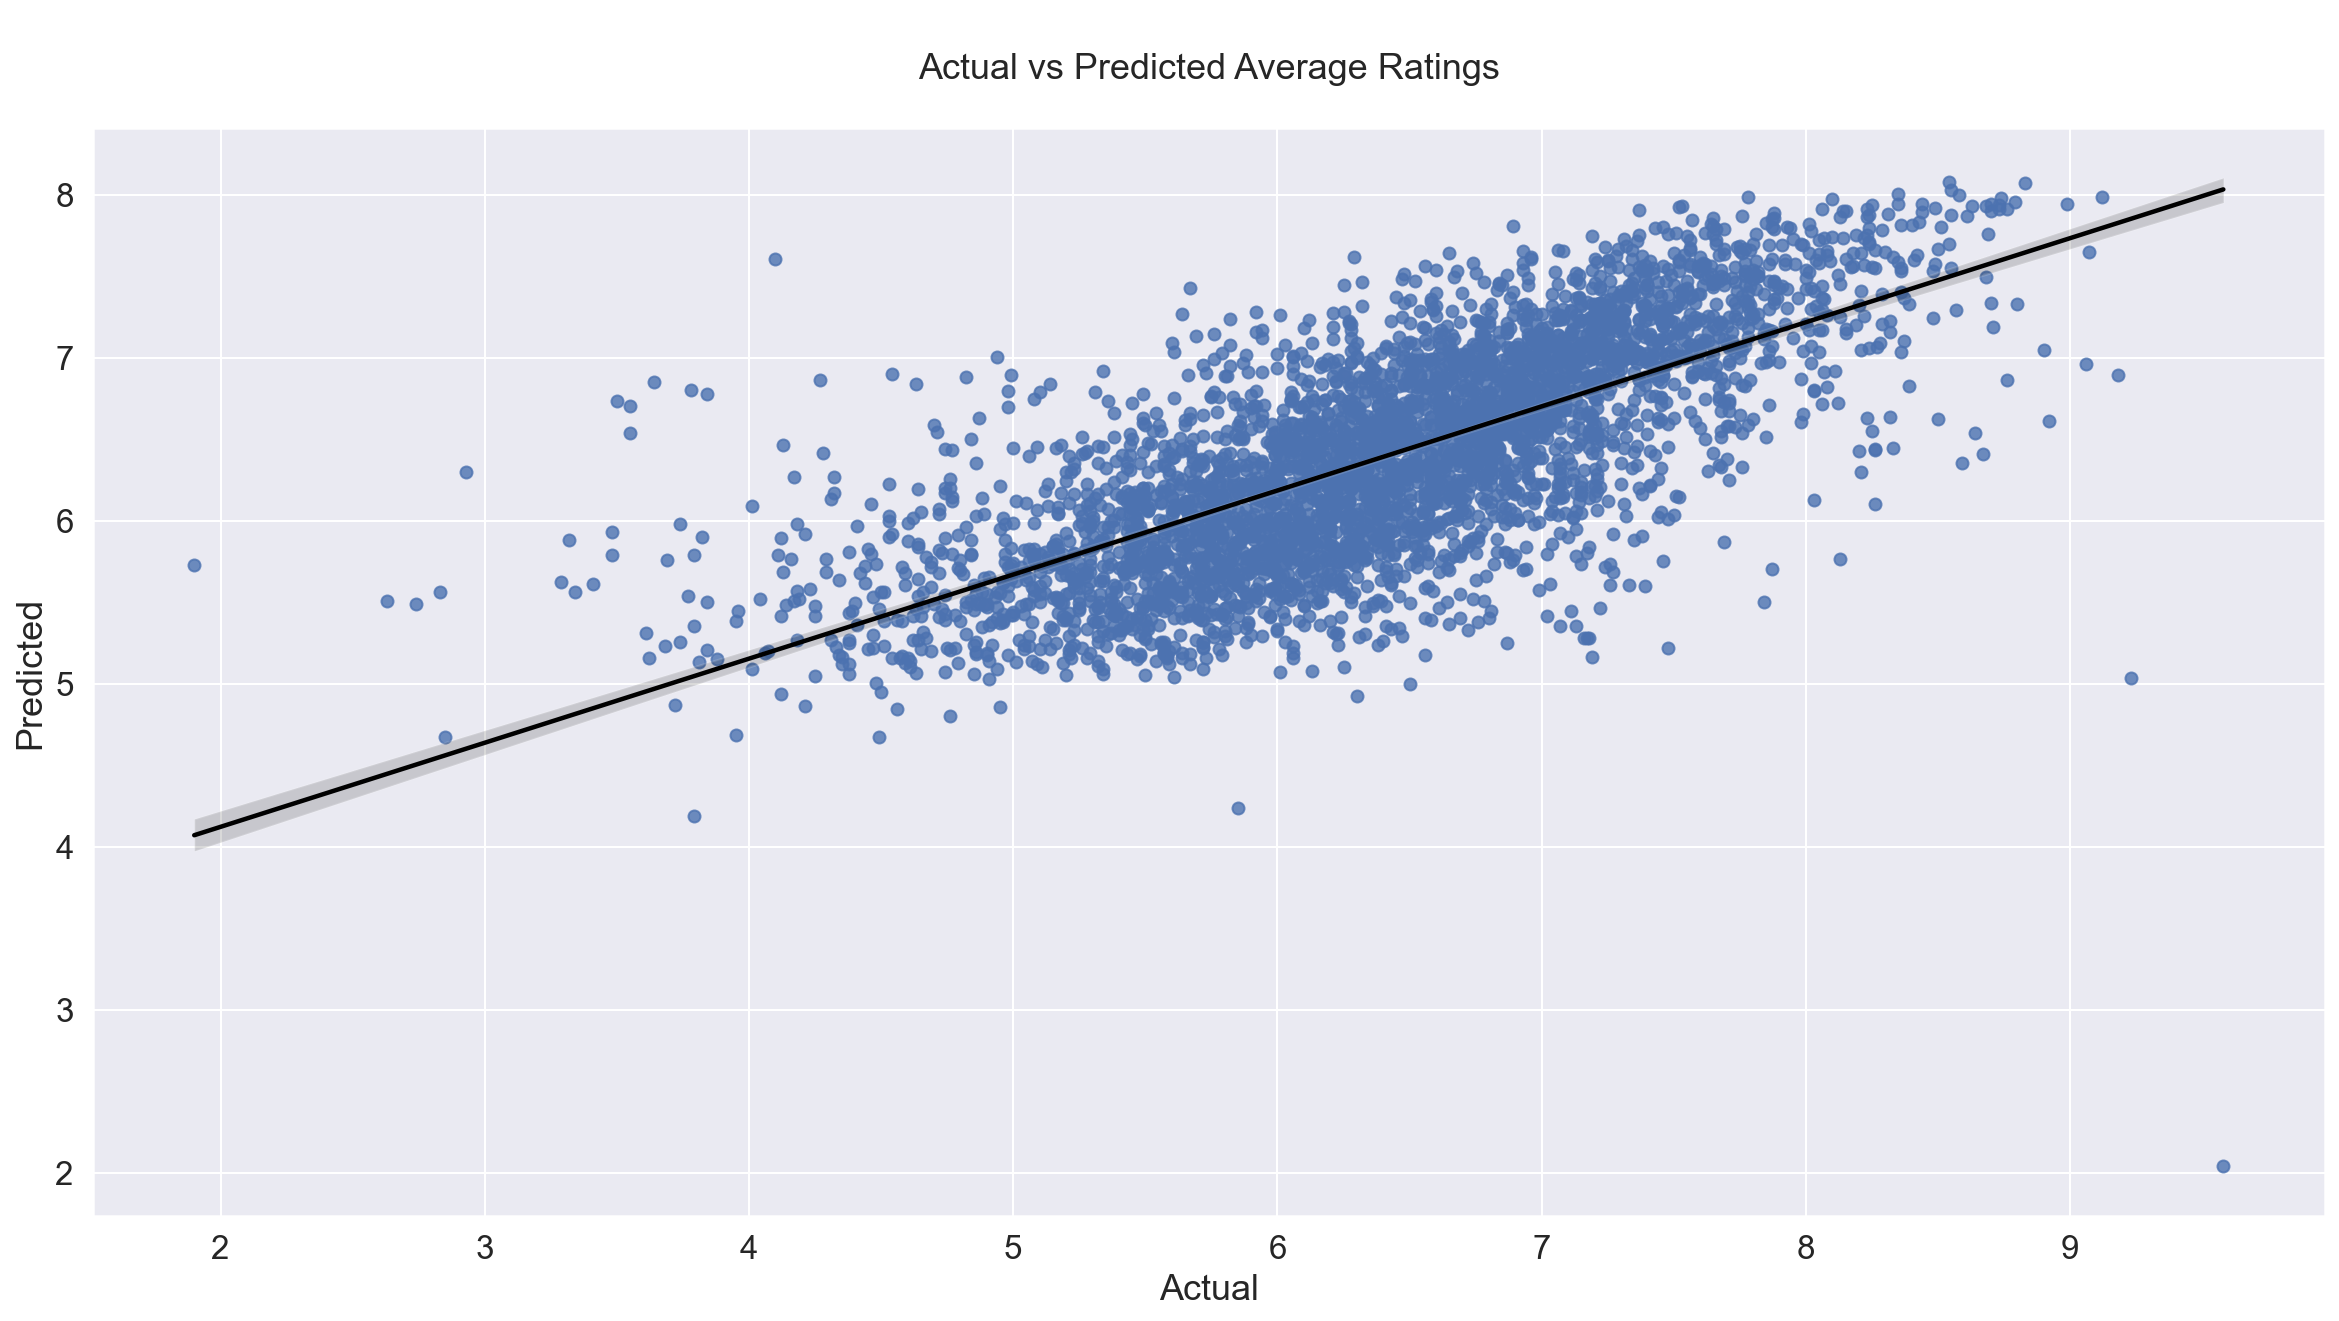

In [169]:
plt.figure(figsize=(20, 10))
sns.regplot(x='Actual', y='Predicted', data=df_pred,
           line_kws={"color": "black"})
plt.title('\nActual vs Predicted Average Ratings\n')
plt.show()

The plot of actual vs predicted did not suggest that there were any areas in our ratings that could be potentially pruned or changed in order to improve our model. The shaded area tells us that the confidence intervals are very small, there is a 95% probability that the true line of best fit lies within.

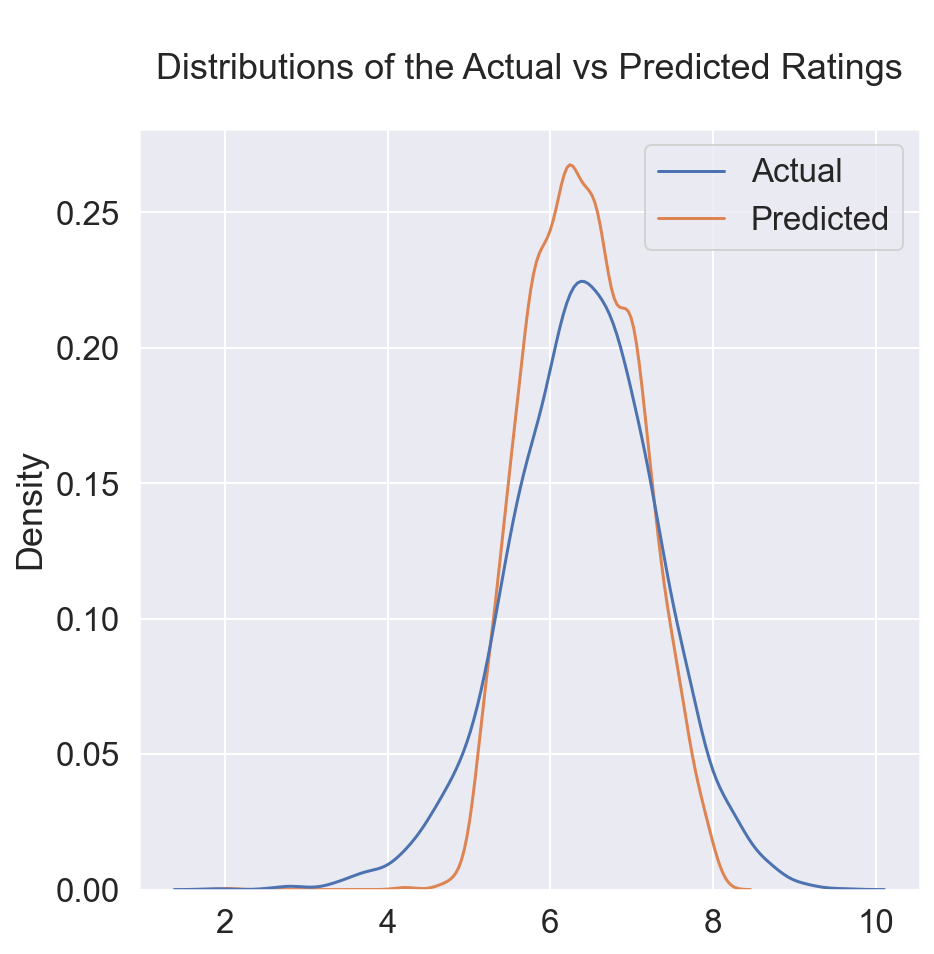

In [170]:
plt.figure(figsize=(7,7))
sns.kdeplot(data=df_pred)
plt.title('\nDistributions of the Actual vs Predicted Ratings\n')
plt.show()

We can see that the fitted values actually tend to cluster around the mean more, with less deviation, unlike the true values, which have a larger spread.

### Looking at Feature Importances

Now we want to have a look at the feature importances in the model, first lets create an model using the best hyperparameters found in the Grid Search that isn't in a pipeline so that we can access them.

This plot shows that the model we created had a tendency of predicting a narrower range of values than actually exist.

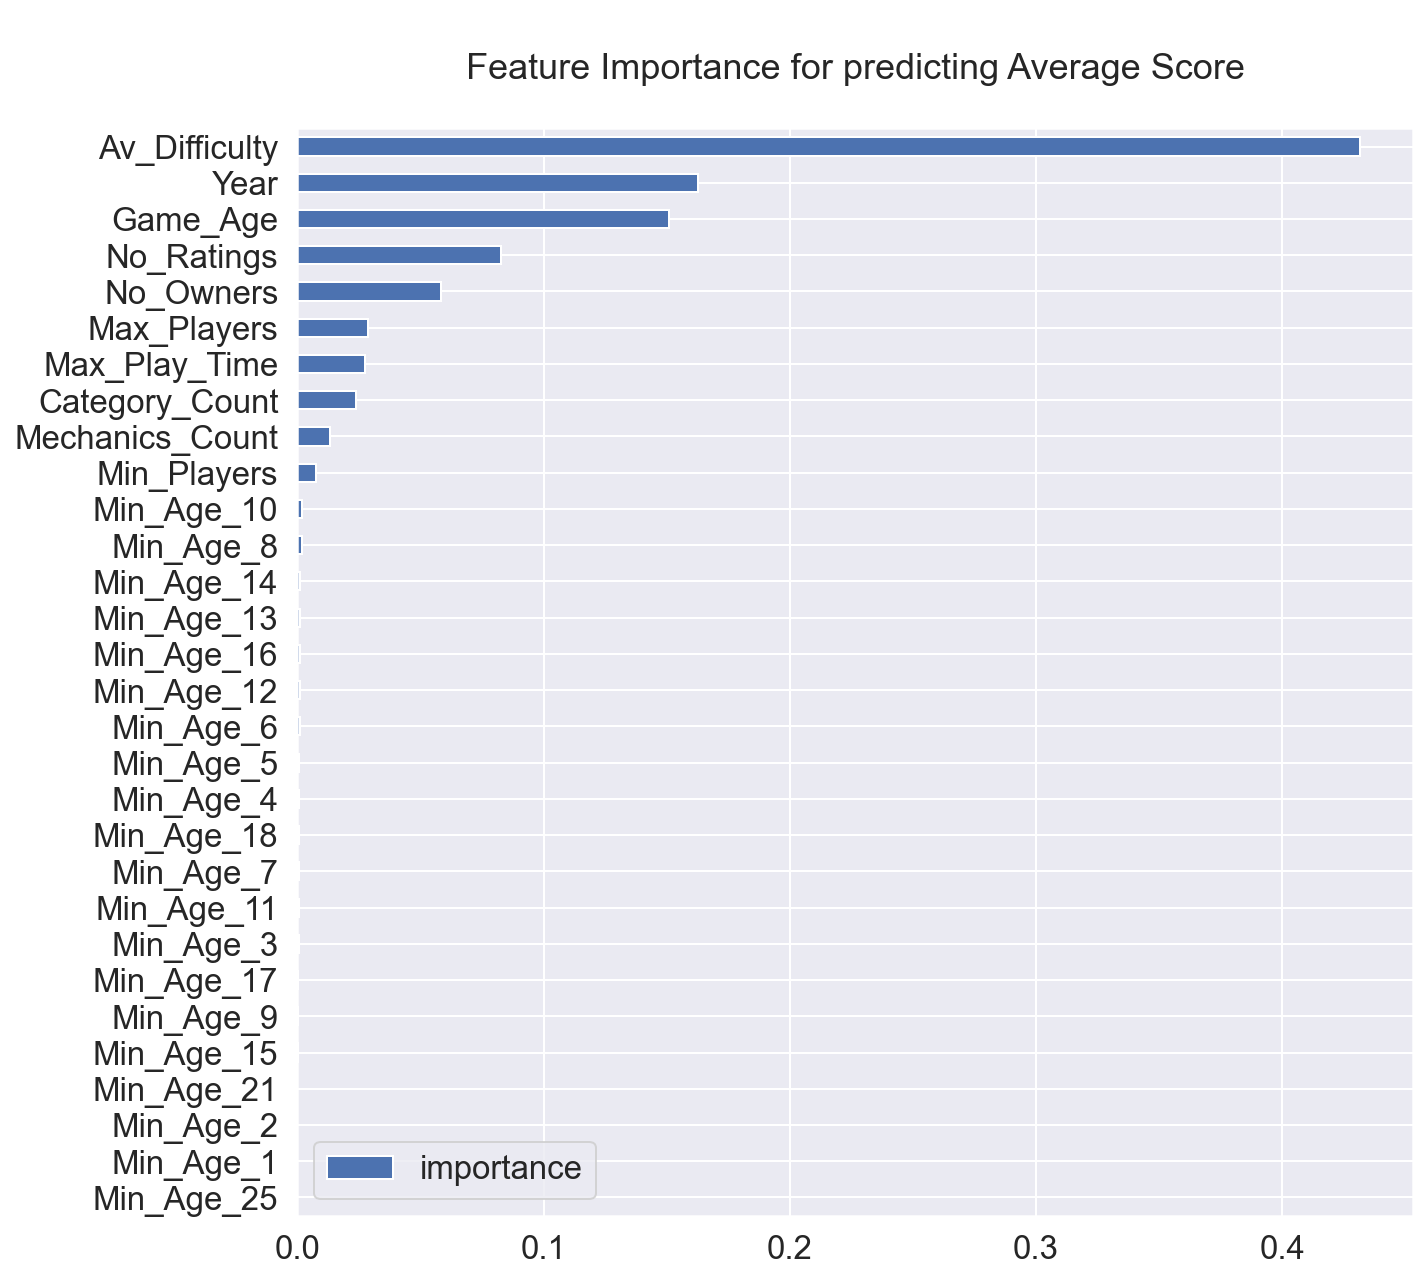

In [171]:
pd.DataFrame(rff.feature_importances_,
             columns=['importance'],
             index=X3.columns,
             ).sort_values(by='importance', ascending=True
                           ).plot(kind='barh', figsize=(10, 10))
plt.title('\nFeature Importance for predicting Average Score\n')
plt.show()

The most important feature by far was the Average Difficulty, not surprising considering it was the most highly correlated with Average Rating.

Interestingly Game Age was slightly stronger that Year, despite being inverses of eachother.

Perhaps to have been expected, having overall provided the poorest performing models bar one, the dummified predictors mostly had no impact on the model.

Although there were 187 different mechanics, their number seemed to have little Importance, while the number of Categories carried a little more weight.

Unfortunately from a Business perspective, the number of ratings and number of owners do have a fair amount of import. Making predicting the potential score for a new board game more difficult.

## Modeling and Evaluation Summary

Several models were chosen at the start to try and predict scores.  The target variable is continuous so Regressors had to be used.

Linear Regression is the simplest and quickest to use. The only caveat for using it is that the target must be normally distributed.

Ridge Regression, as some instances I wanted to investigate were going to have multicollinearity, Ridge was chosen as a possible model, as it limits the importance of those particular predictors.

Decision Tree: Creates a hierarchical structure where nodes ask questions of subsets of the data provided.

Random Forest: A bagging method that essentially combines many decision trees to quickly overcome their limitations of working well outside of their training data.

From the initial investigations of the pipeline models, it was found that the best performing model, based on mean CV scores, was:
- A Random Forest Regressor
- Included all outliers
- Had multicollinearity

The R2 score attained, even after hyperparameter tuning using GridSearch, was only 0.5, well below the baseline of 6.4. This was down from the 0.549 score on the training data, suggesting overfitting. Aside from getting more data and removing features, further hyperparameter tuning would also help. Such as increasing the max depth the number of estimators, the more trees and the deeper they are, the more likely the model is to overcome the limitations of Decision Trees.

The RMSE was also relatively high, 0.65, above rule of thumb value of 0.4 that dictates a good model.

The MAE was larger than the MSE, this tells about the nature of the errors, being that the errors were constant in their difference to the actual values, with not alot of fluctuation.

Future work on the project would be to evaluate the other model instances that were not Grid searched, to see how they would behave differently after their hyperparameters were tuned and hence the effect of outliers and multicollinearity.

<img src="https://media.timeout.com/images/105627949/750/422/image.jpg" width="600">